In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms

/sw/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/sw/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/sw/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
os.chdir('/Users/Erin/git/moo_and_mcmc/dream/examples/ndim_gaussian/')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = np.load('ndimgauss_mtdreamzs_3chain_'+str(trace)+'1_sampled_params_chain_0.npy')
    traces[trace] = [traces[trace]]
    for chain in range(1, 3):
        traces[trace].append(np.load('ndimgauss_mtdreamzs_3chain_'+str(trace)+'1_sampled_params_chain_'+str(chain)+'.npy'))

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = np.load('ndimgauu_mtdreamzs_3chain_'+str(trace)+'1_logps_chain_0.npy')
    logps[trace] = [logps[trace]]
    for chain in range(1, 3):
        logps[trace].append(np.load('ndimgauu_mtdreamzs_3chain_'+str(trace)+'1_logps_chain_'+str(chain)+'.npy'))

In [5]:
traces['a'][0].shape

(50000, 100)

In [6]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [str(i) for i in range(100)]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(param_trace_dict_a['param_list']):
        param_trace_dict_a[param] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [str(i) for i in range(100)]

In [7]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  100  of  100  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  100  of  100  parameters.
Percent of parameters with GR below 1.1:  100.0


[100, 100.0, 100, 100.0]

In [8]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  100  of  100  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  100  of  100  parameters.
Percent of parameters with GR below 1.1:  100.0


[100, 100.0, 100, 100.0]

In [9]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  100  of  100  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  100  of  100  parameters.
Percent of parameters with GR below 1.1:  100.0


[100, 100.0, 100, 100.0]

In [10]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  100  of  100  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  100  of  100  parameters.
Percent of parameters with GR below 1.1:  100.0


[100, 100.0, 100, 100.0]

50000
3
50000


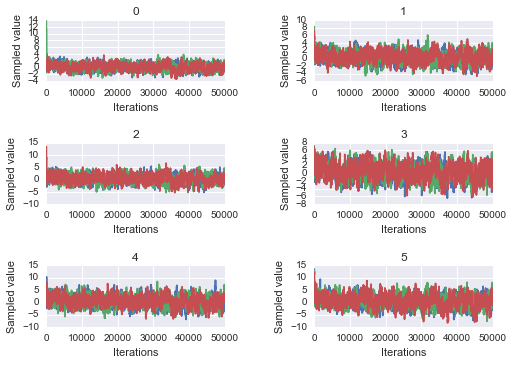

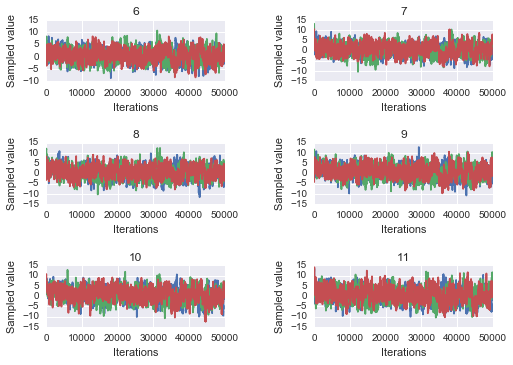

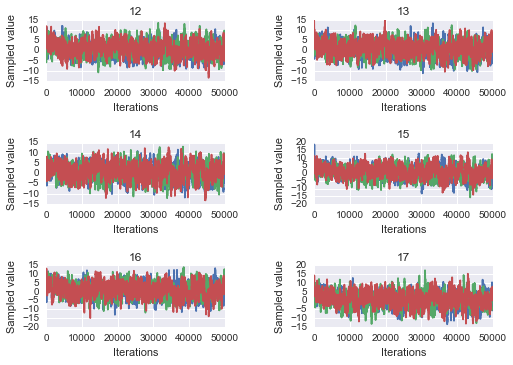

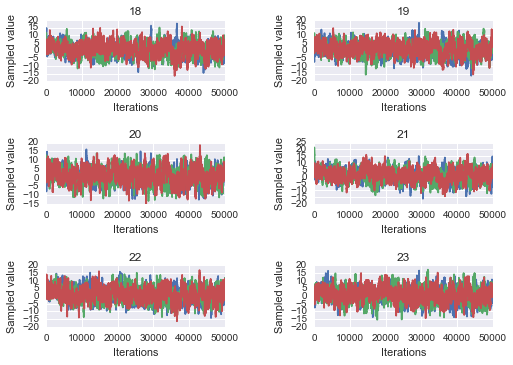

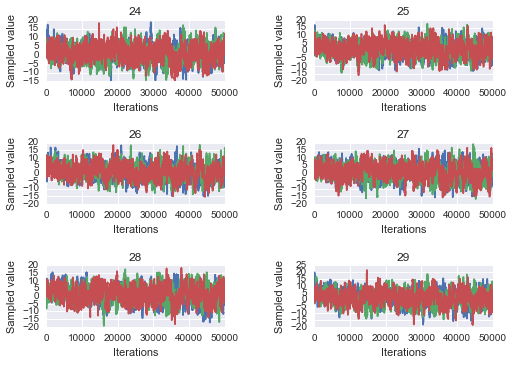

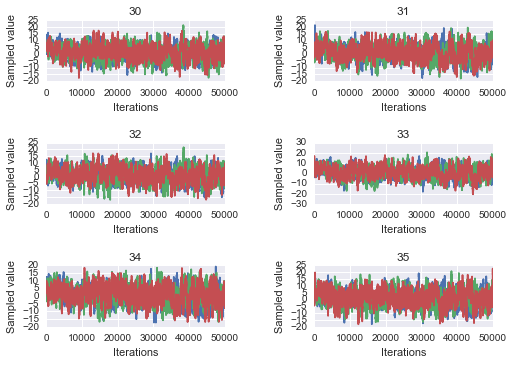

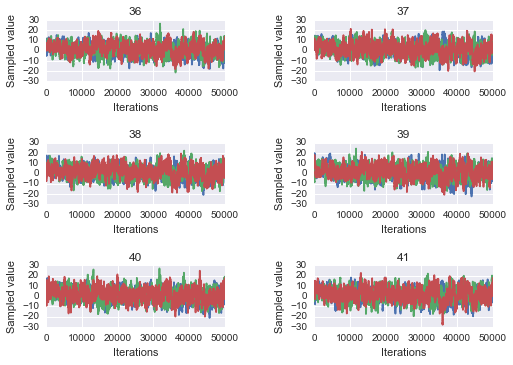

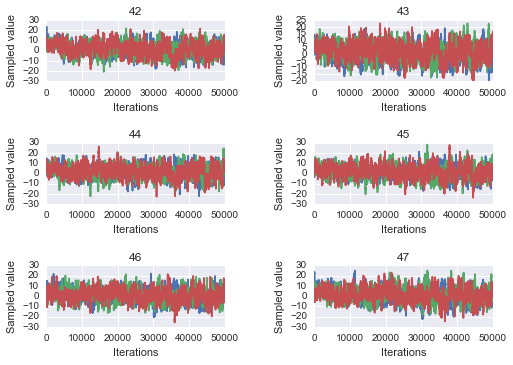

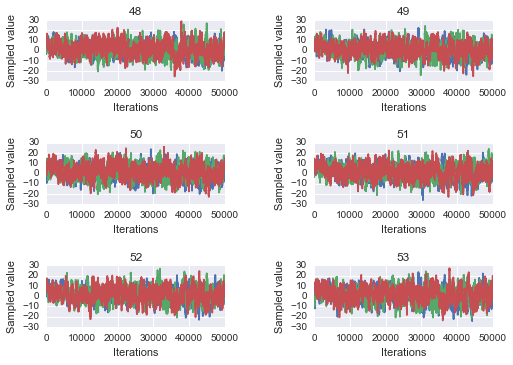

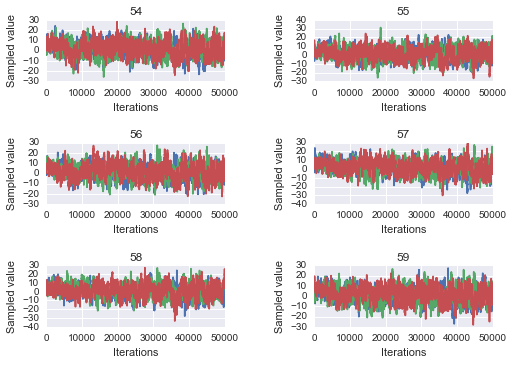

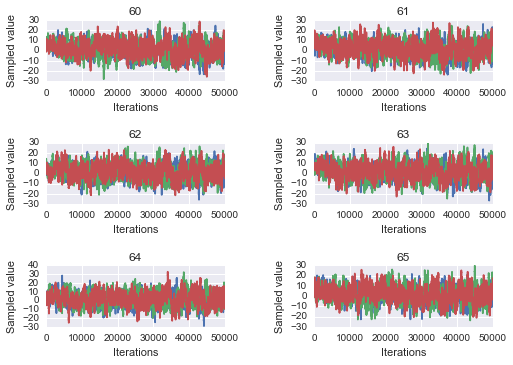

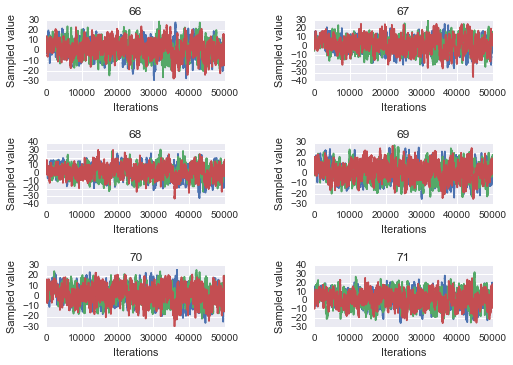

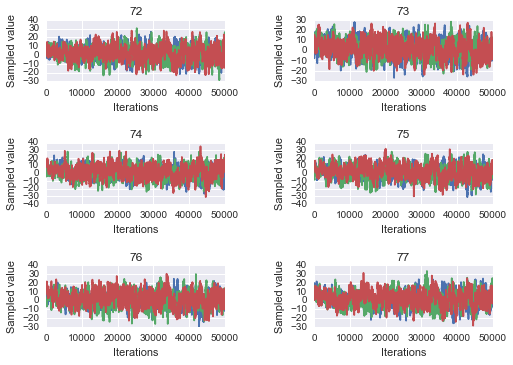

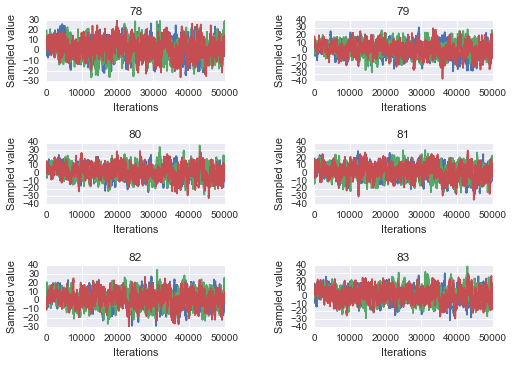

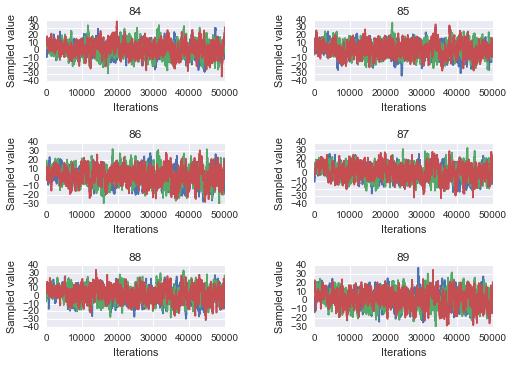

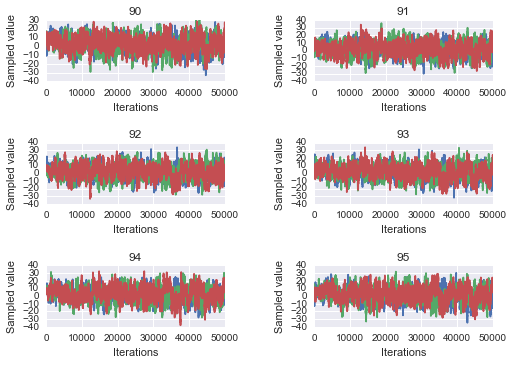

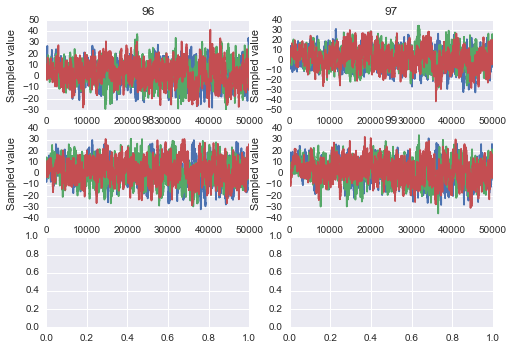

In [11]:
sample_plots(param_trace_dicts['a'])

50000
3
50000


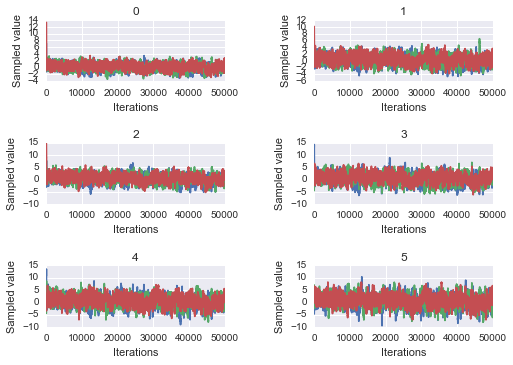

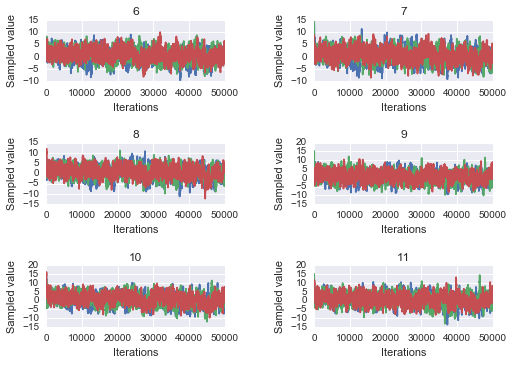

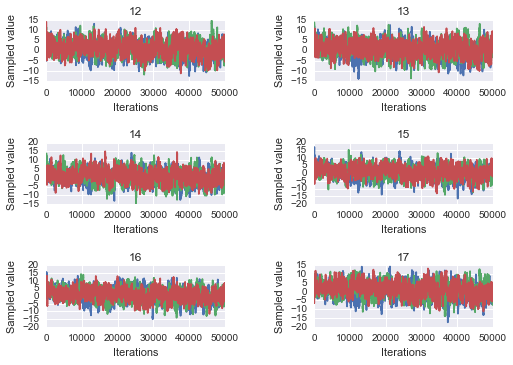

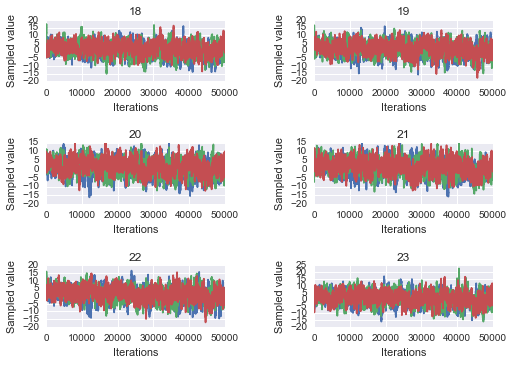

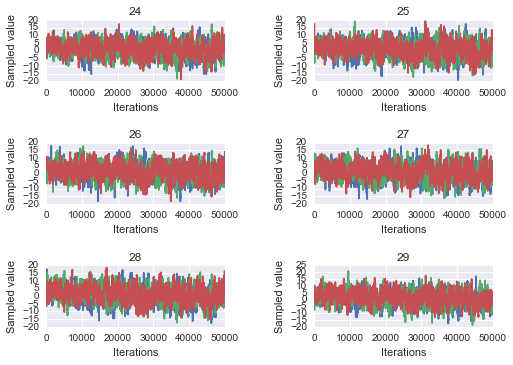

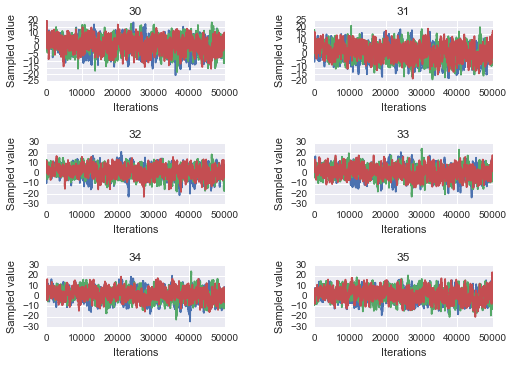

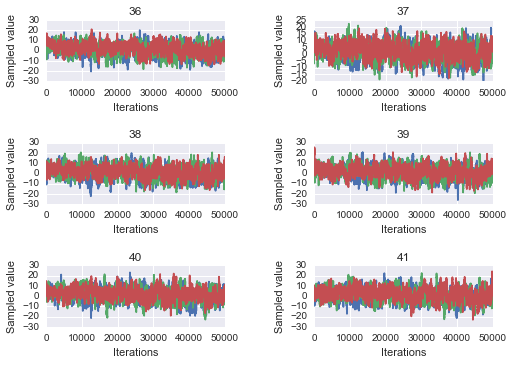

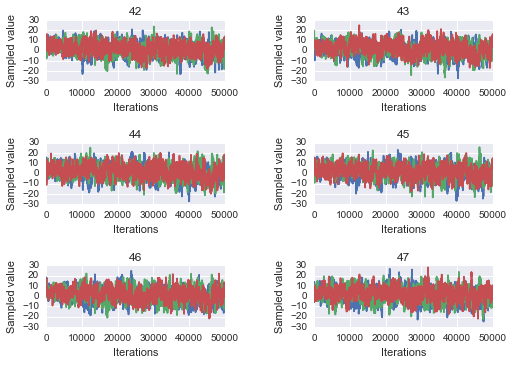

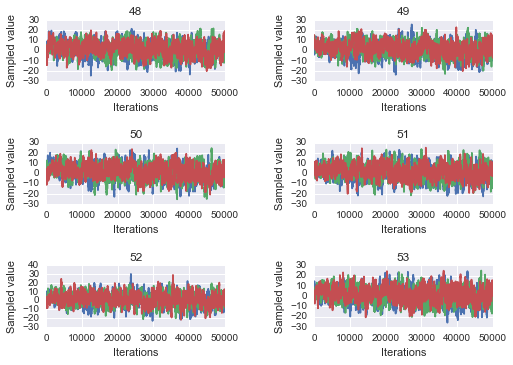

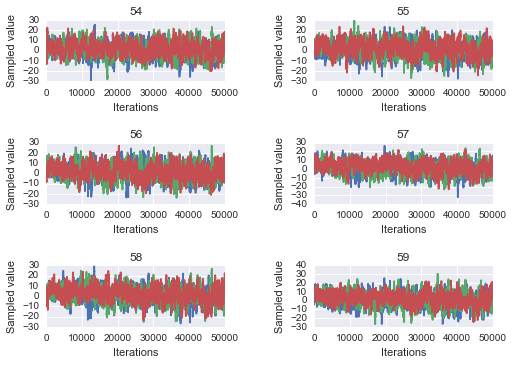

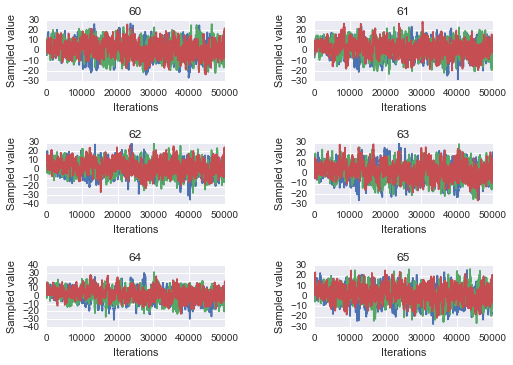

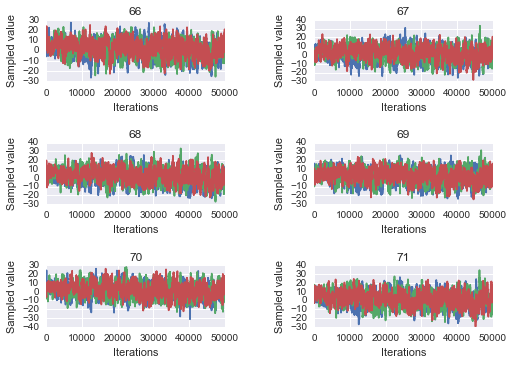

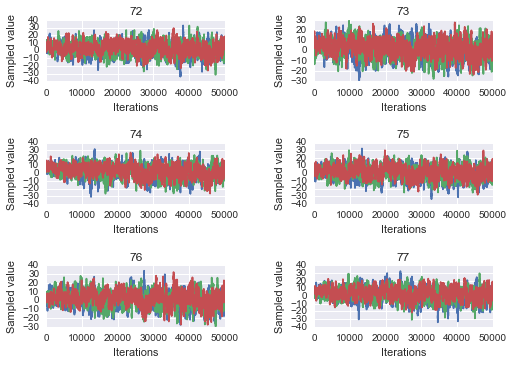

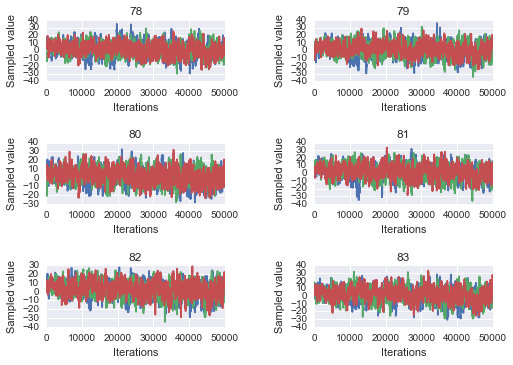

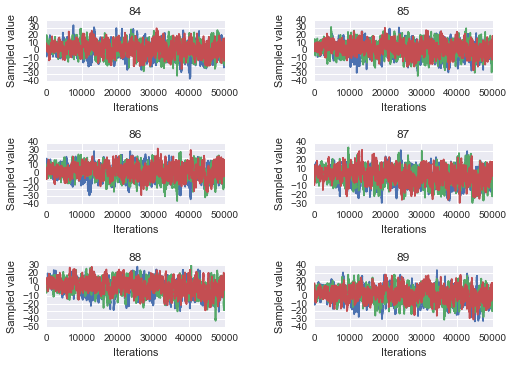

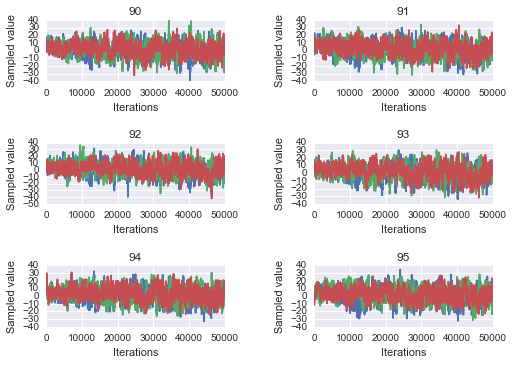

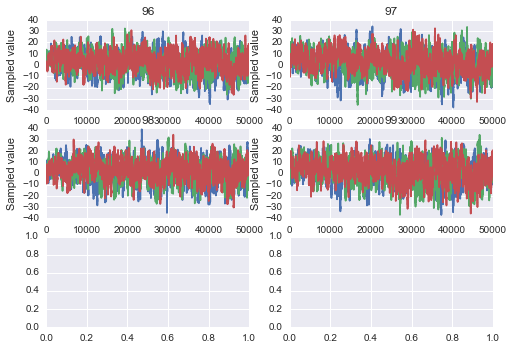

In [12]:
sample_plots(param_trace_dicts['b'])

50000
3
50000


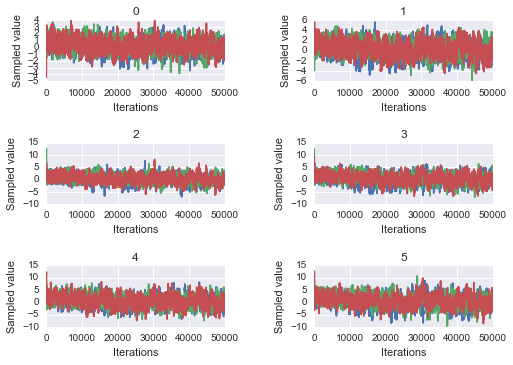

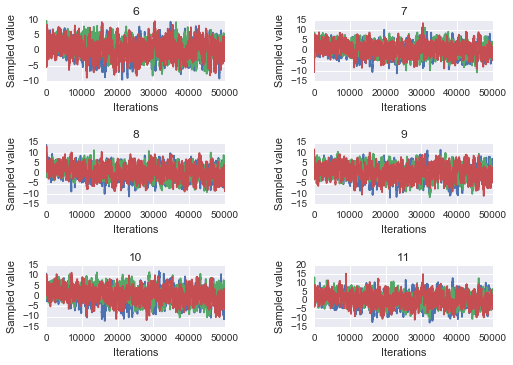

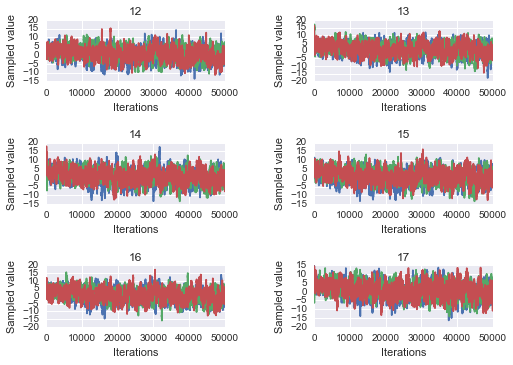

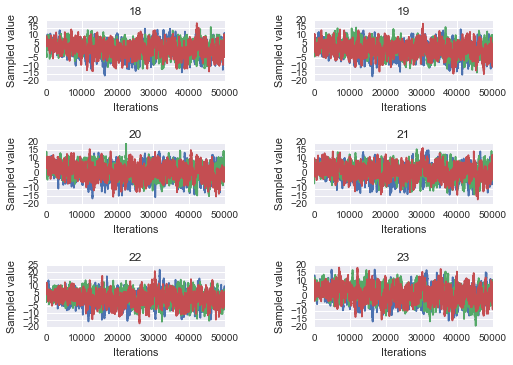

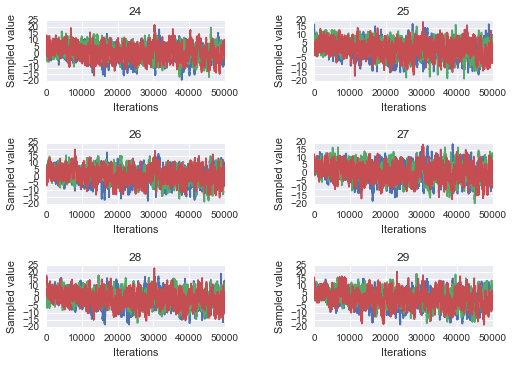

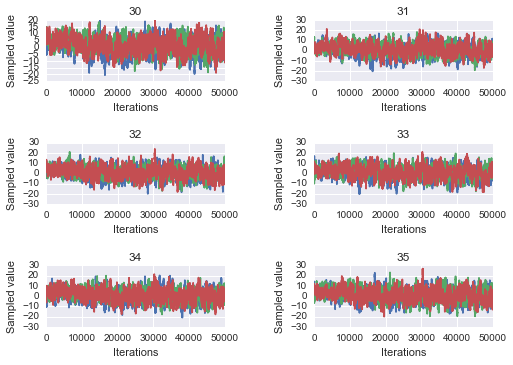

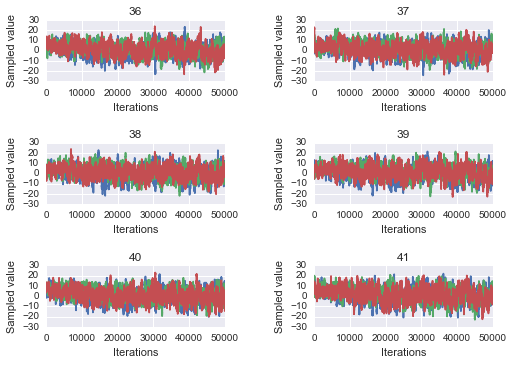

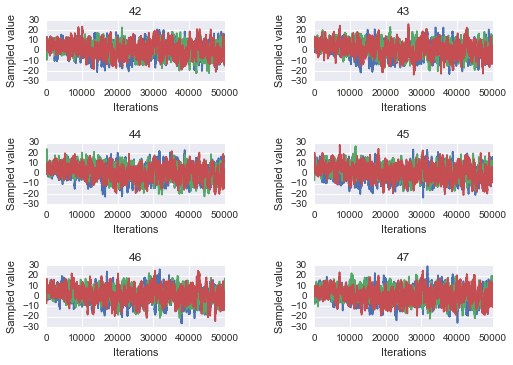

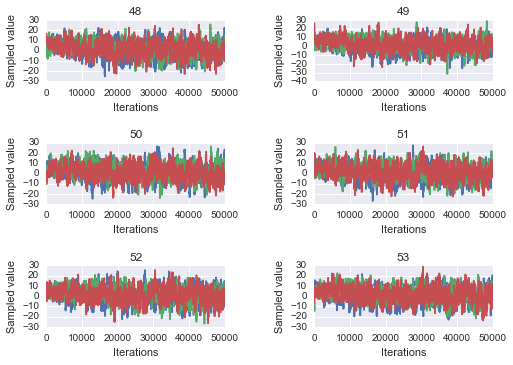

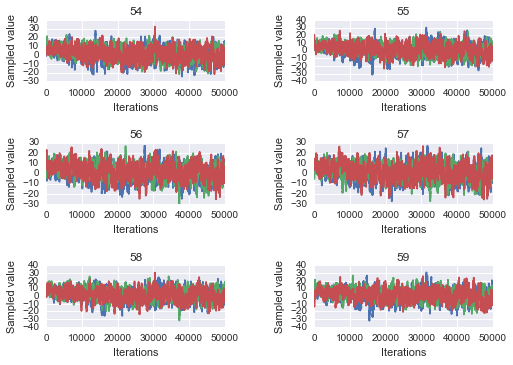

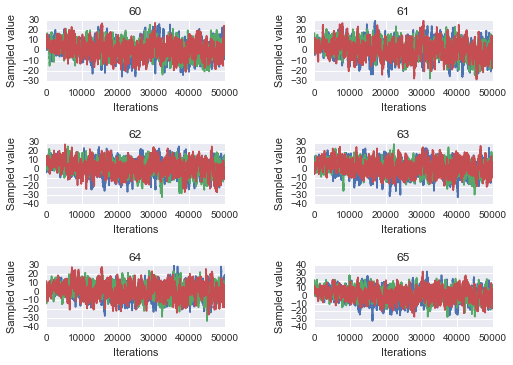

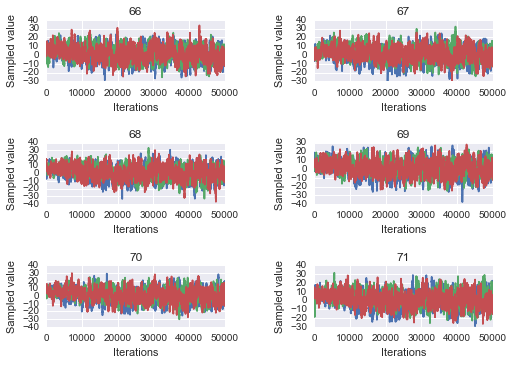

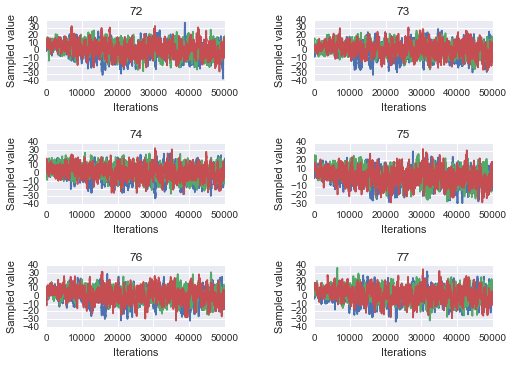

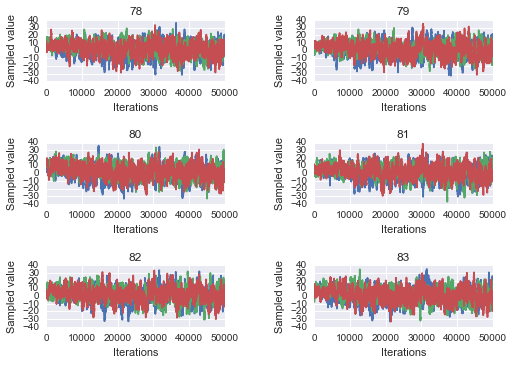

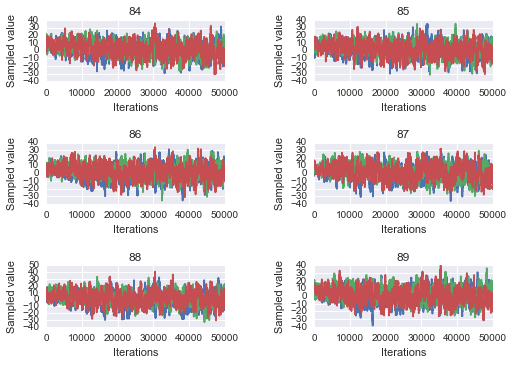

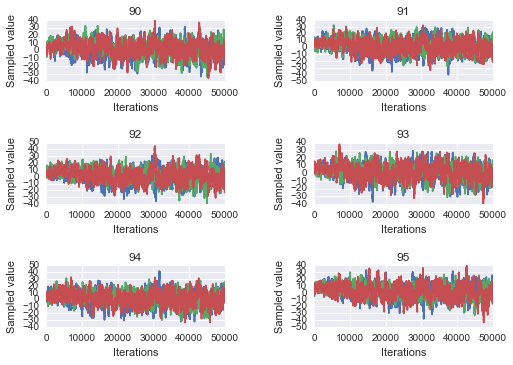

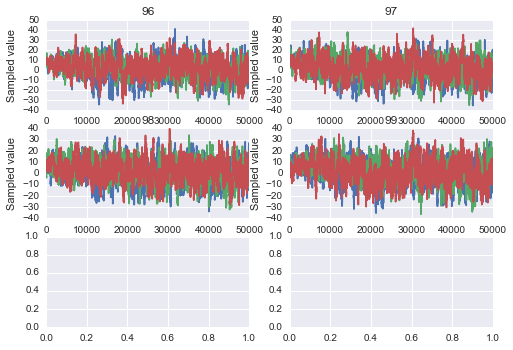

In [13]:
sample_plots(param_trace_dicts['c'])

50000
3
50000


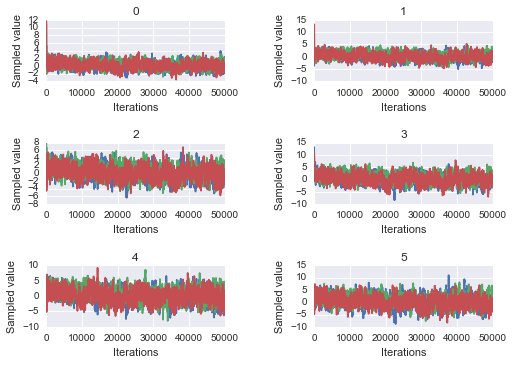

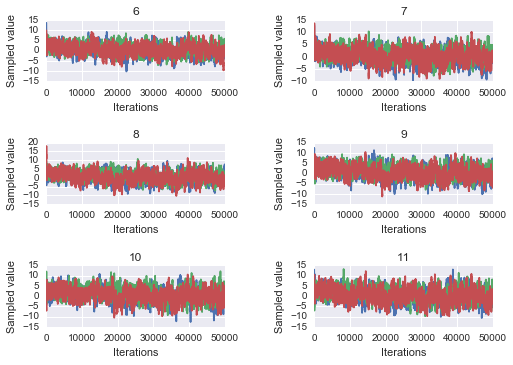

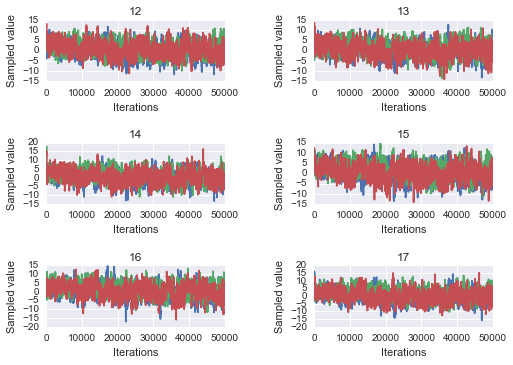

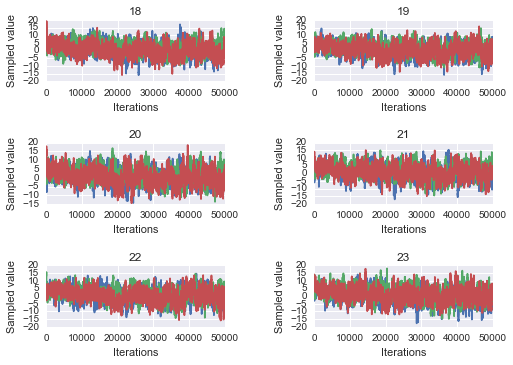

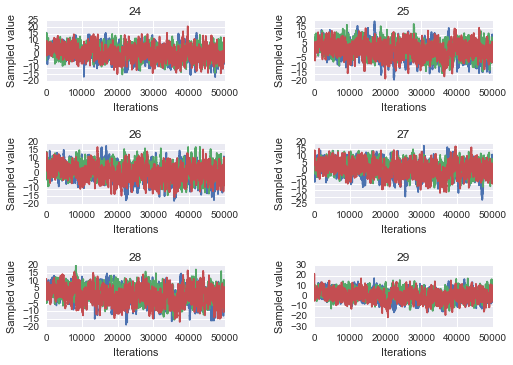

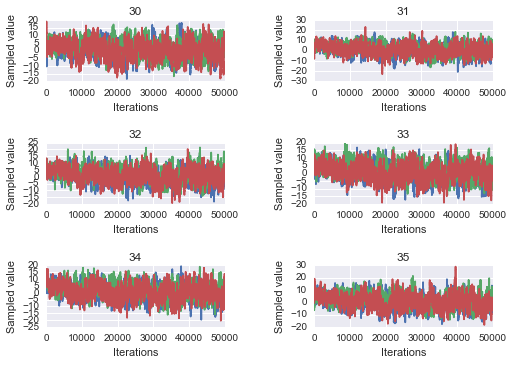

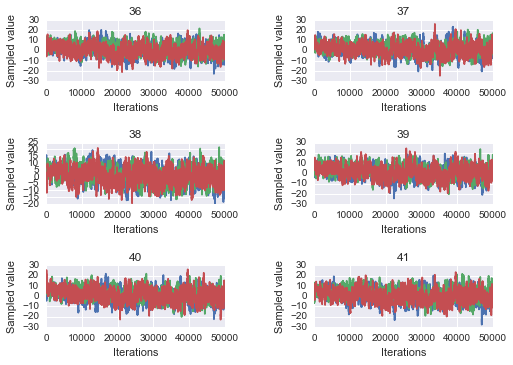

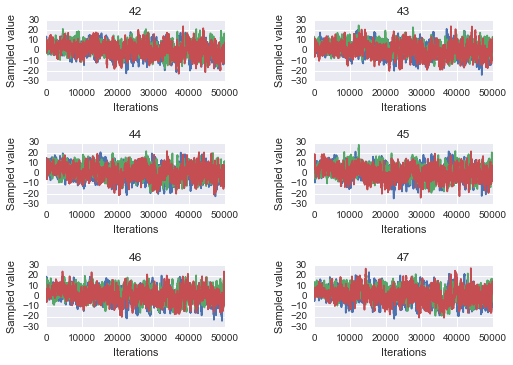

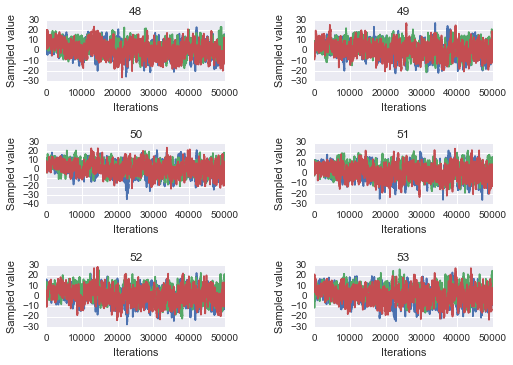

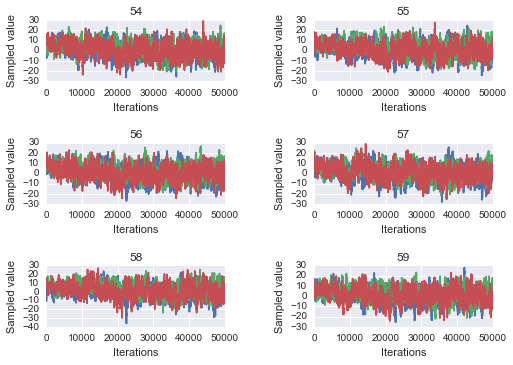

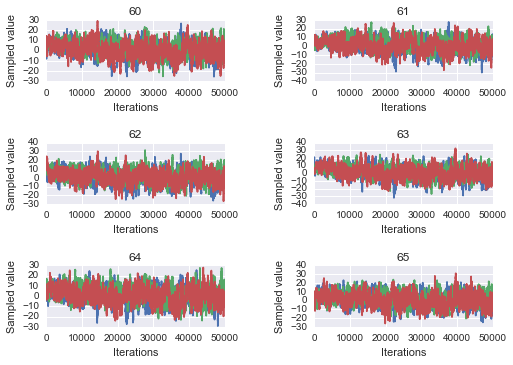

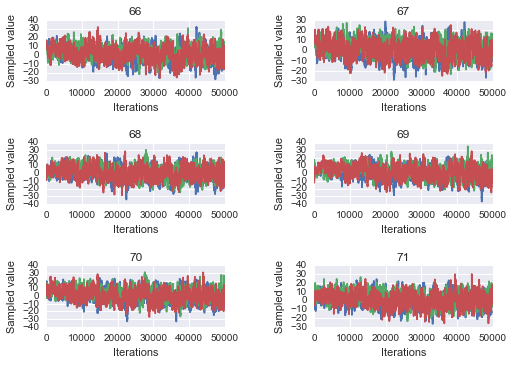

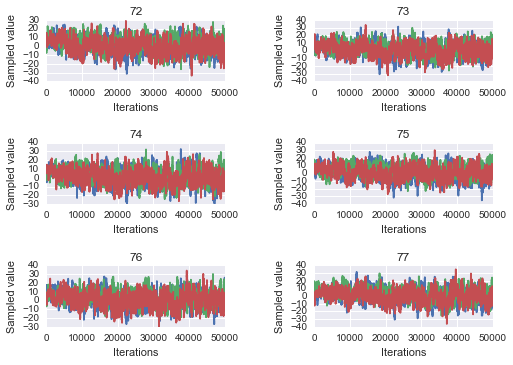

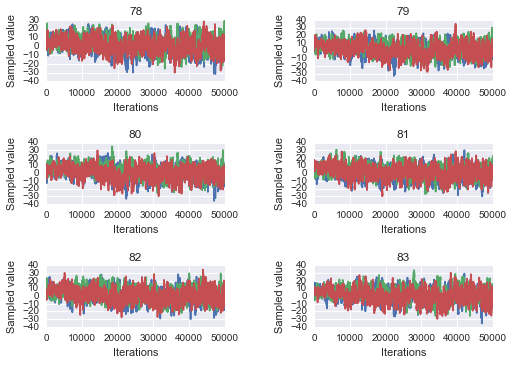

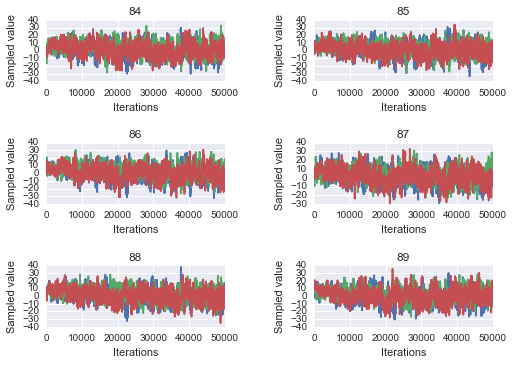

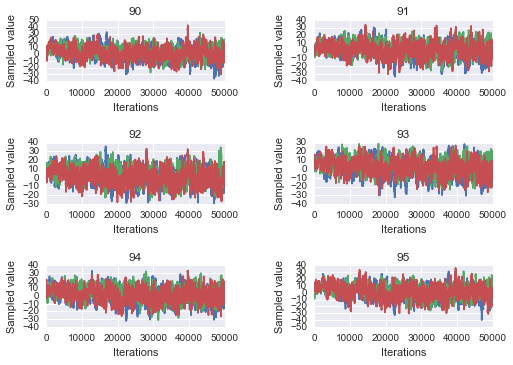

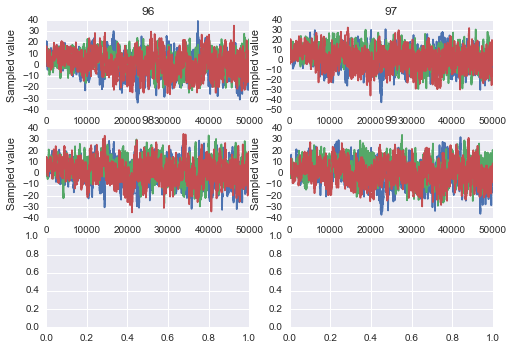

In [14]:
sample_plots(param_trace_dicts['d'])

In [15]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=25000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=25000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=25000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=25000, thin=1)

In [17]:
d = 100
A = .5 * np.identity(d) + .5 * np.ones((d,d))
C = np.zeros((d,d))
for i in range(d):
    for j in range(d):
        C[i][j] = A[i][j] * np.sqrt((i+1)*(j+1))
mu = np.zeros(d)
samples = np.random.multivariate_normal(mu, C, 100000)

In [19]:
samples.shape

(100000, 100)

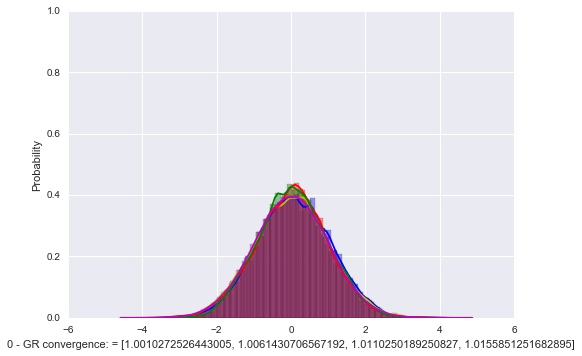

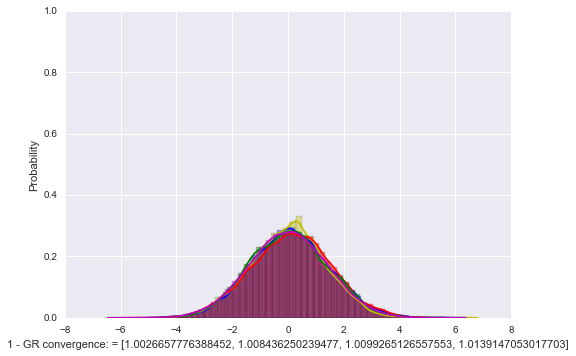

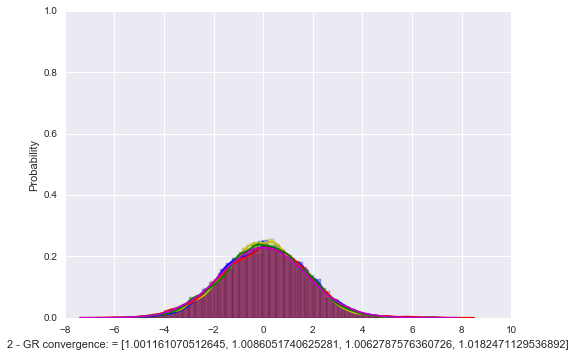

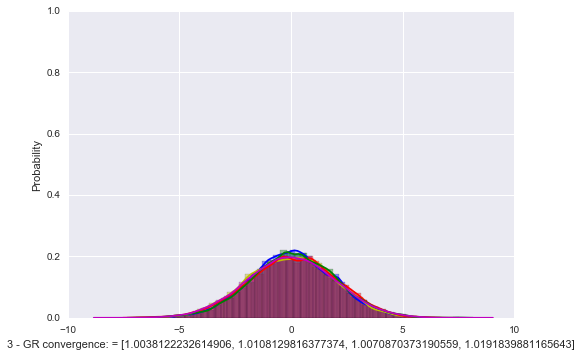

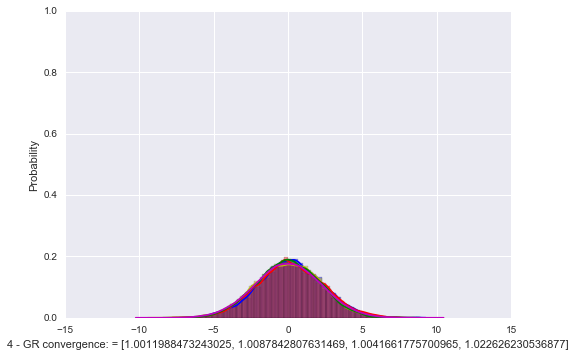

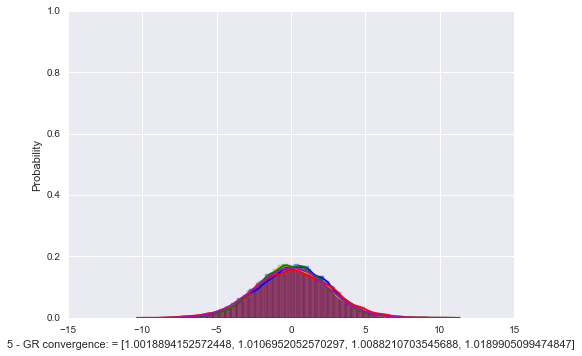

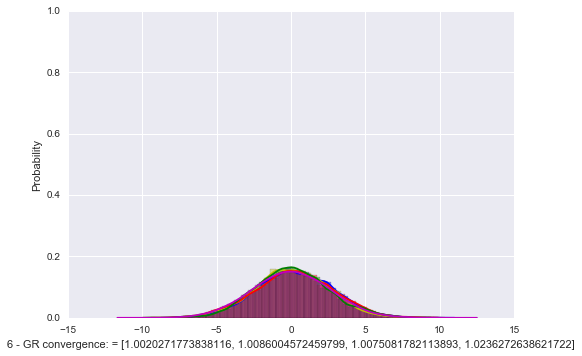

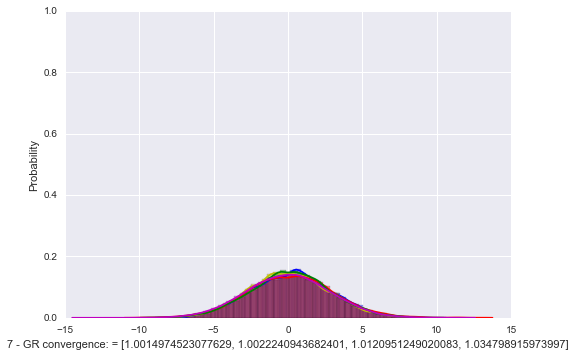

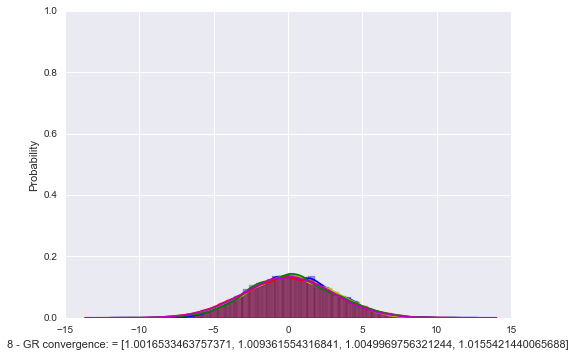

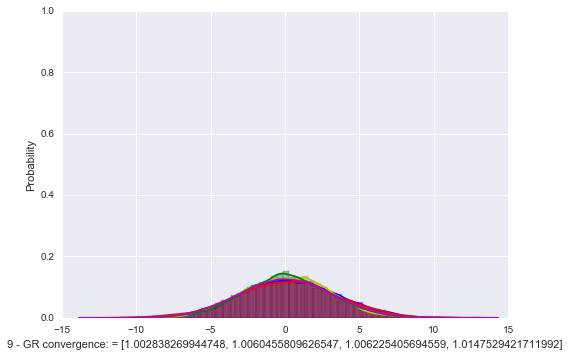

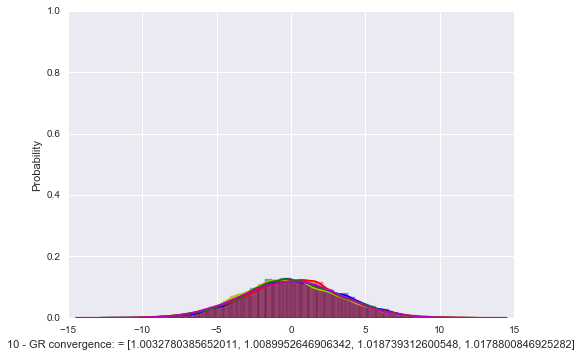

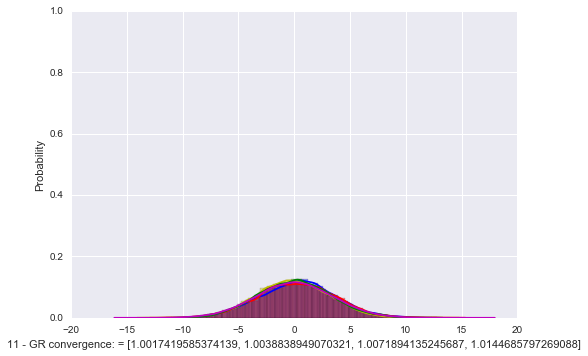

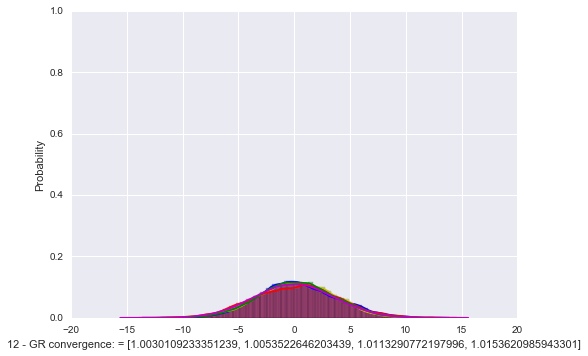

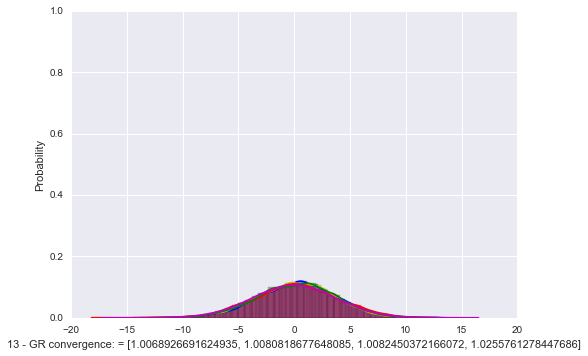

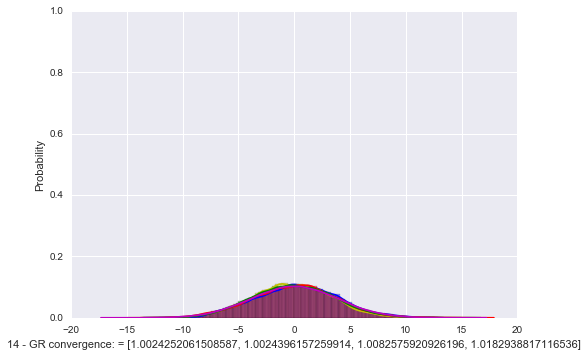

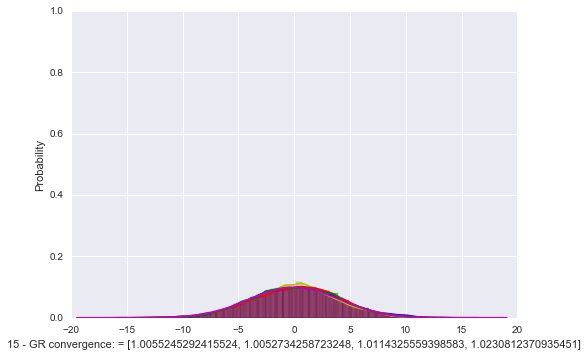

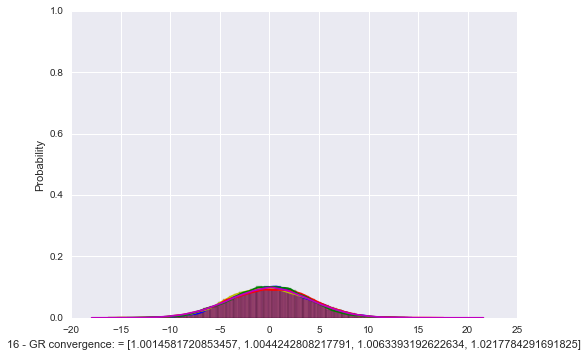

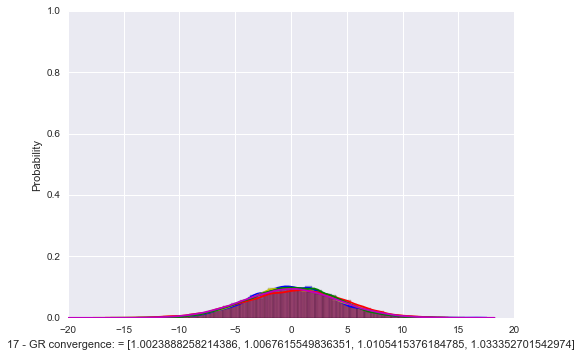

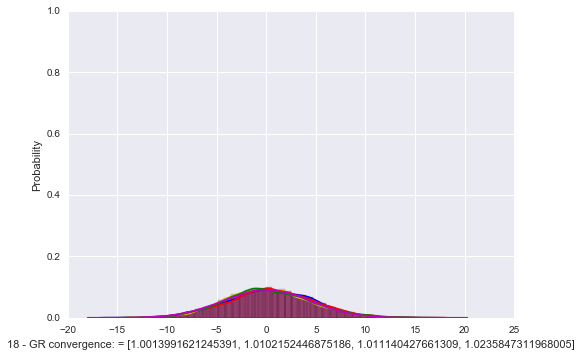

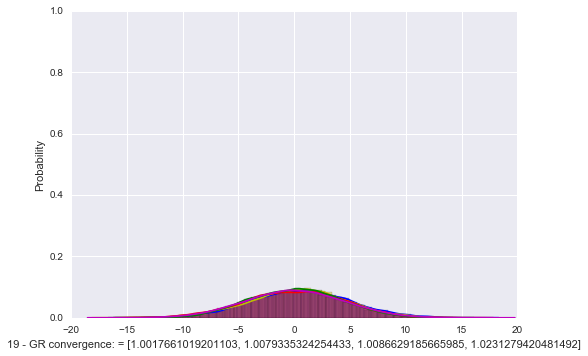

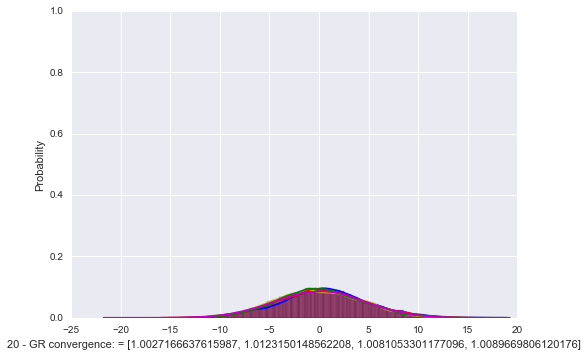

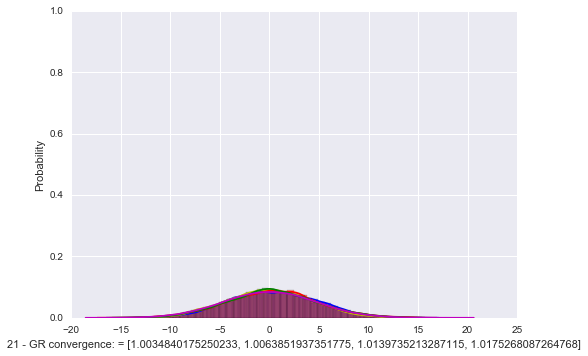

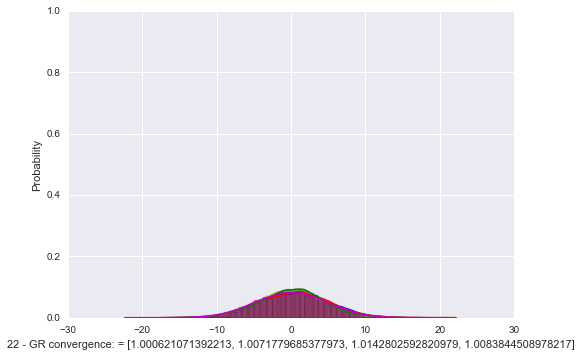

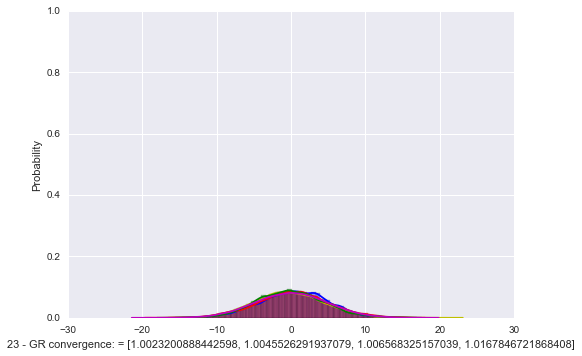

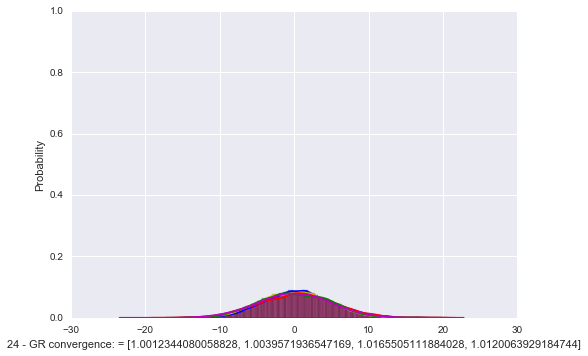

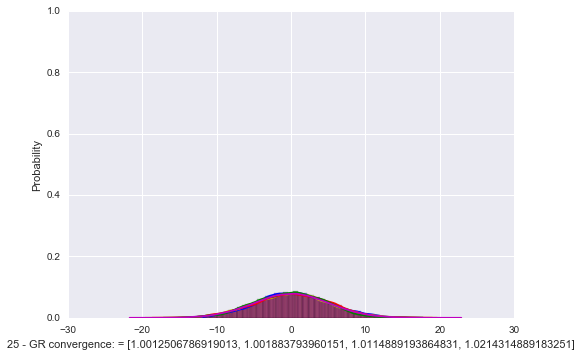

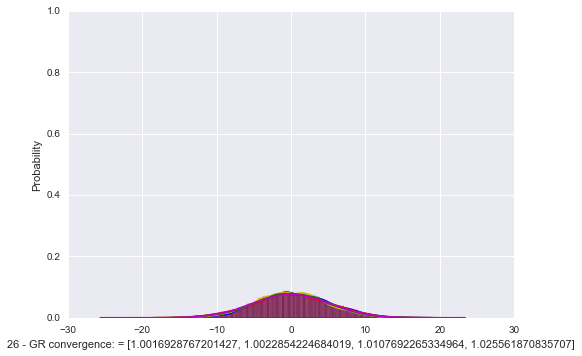

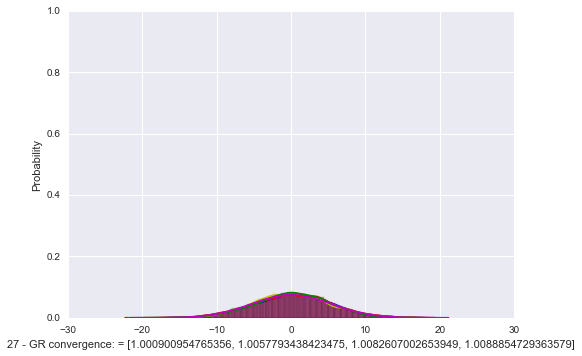

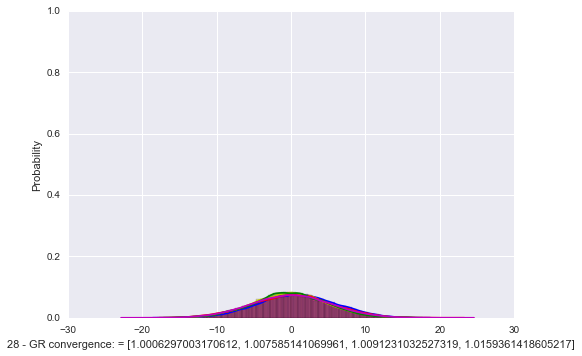

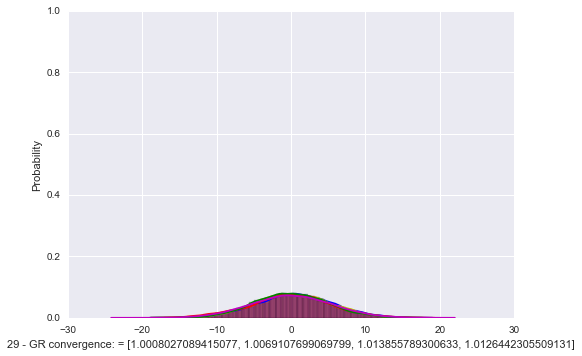

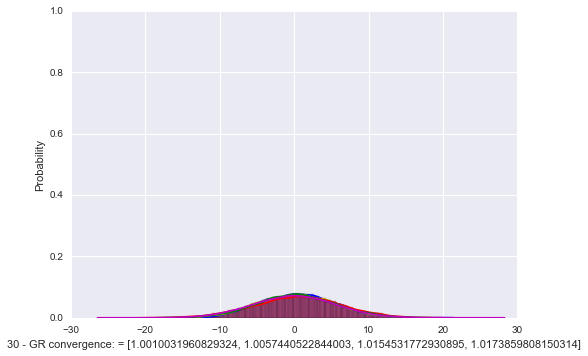

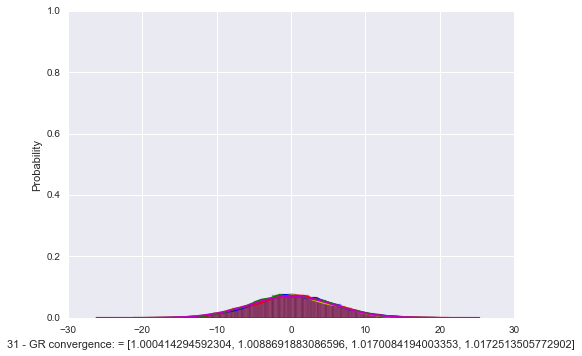

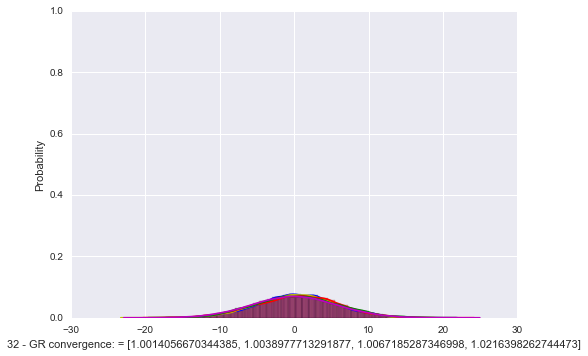

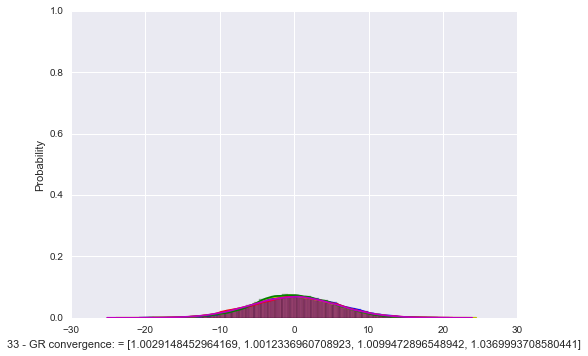

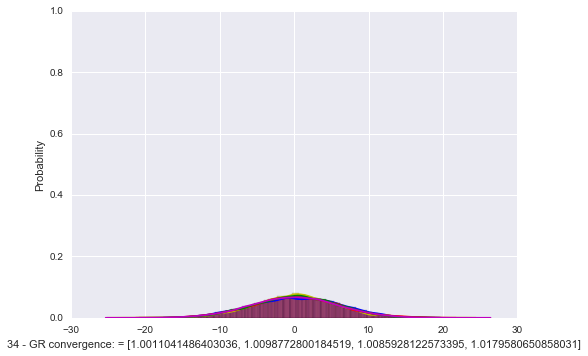

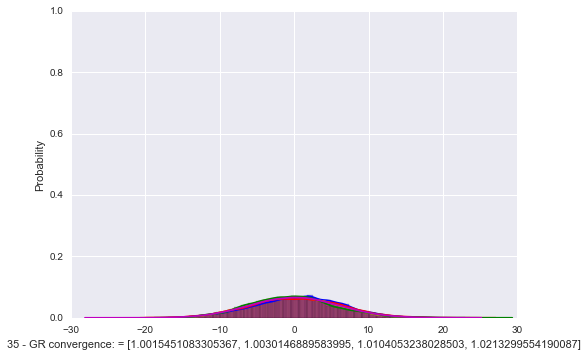

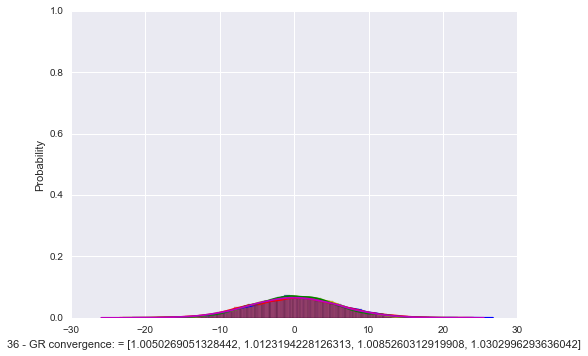

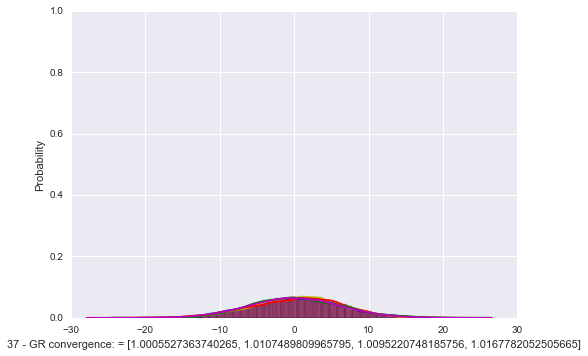

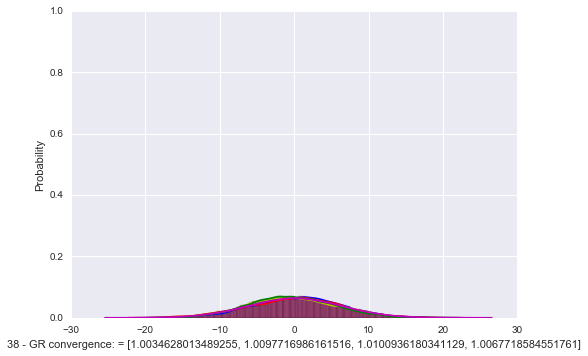

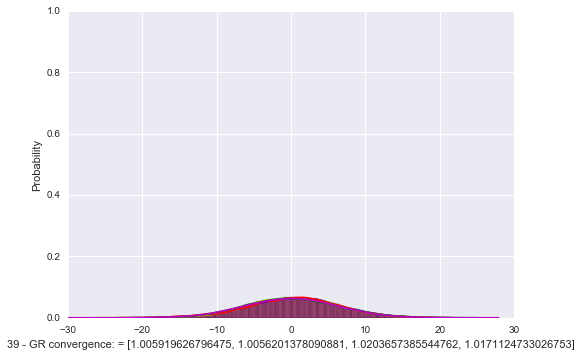

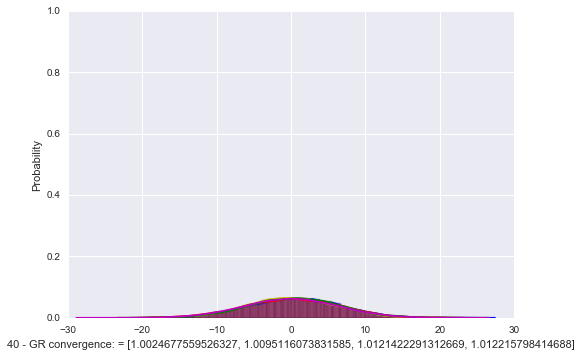

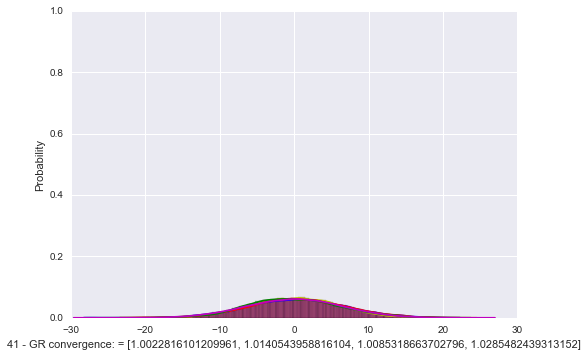

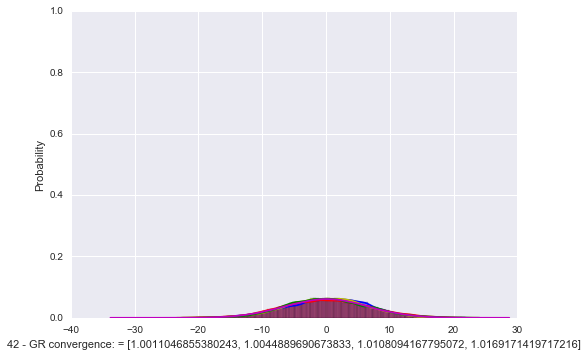

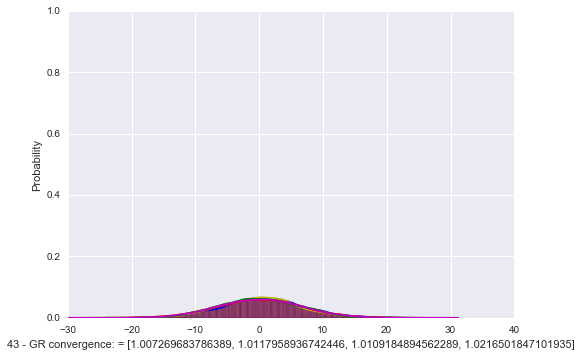

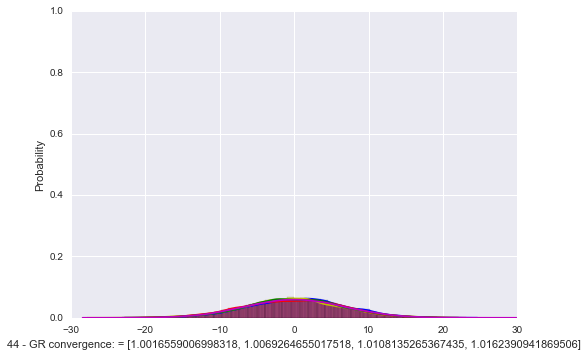

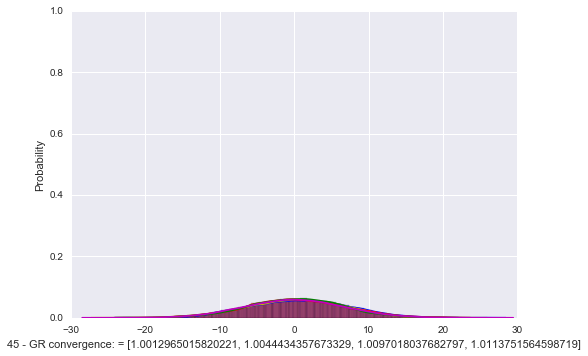

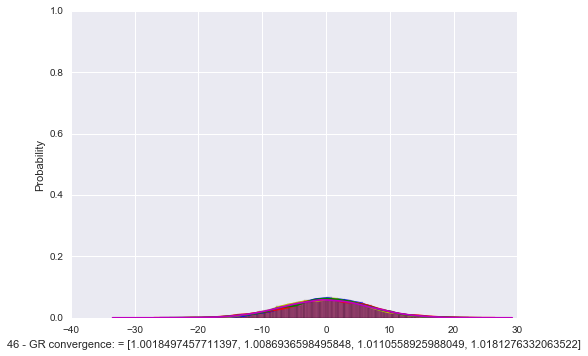

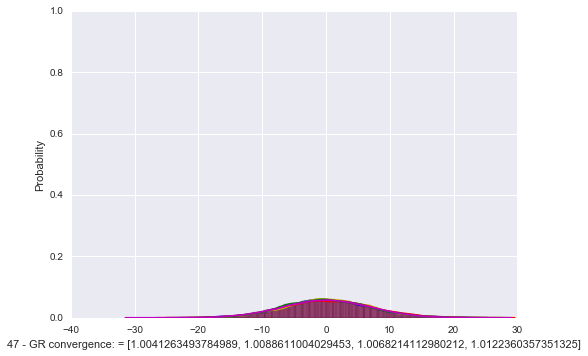

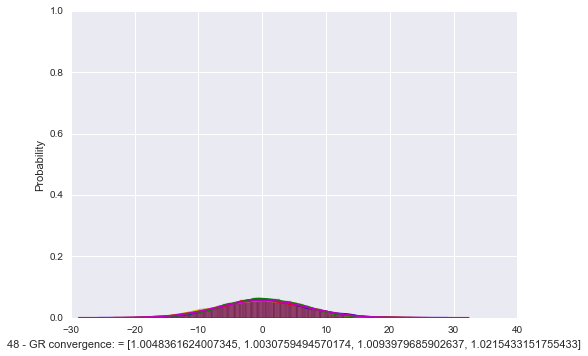

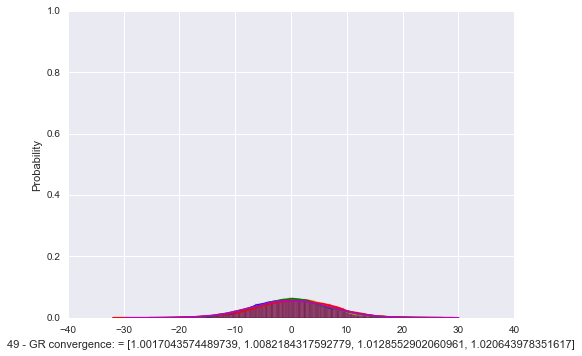

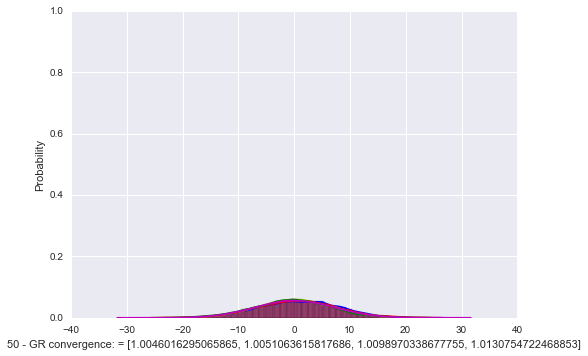

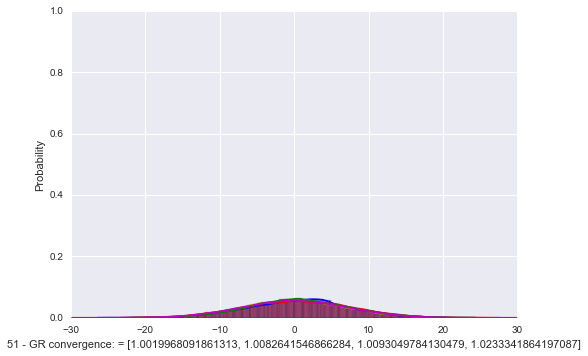

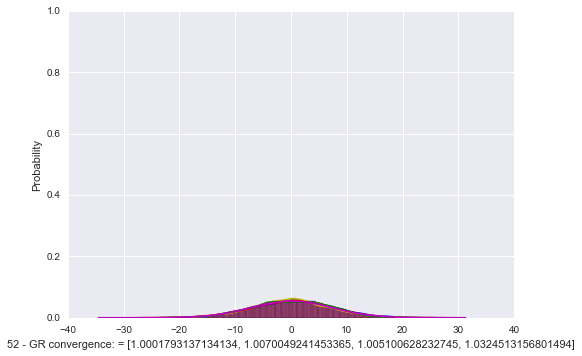

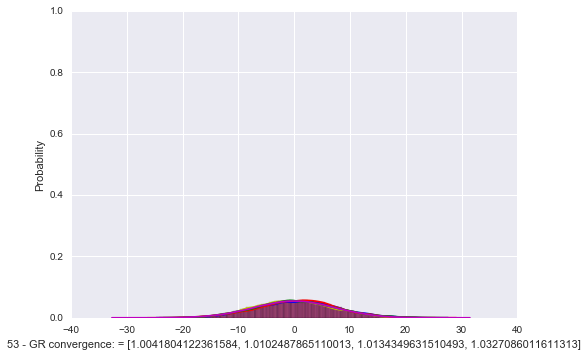

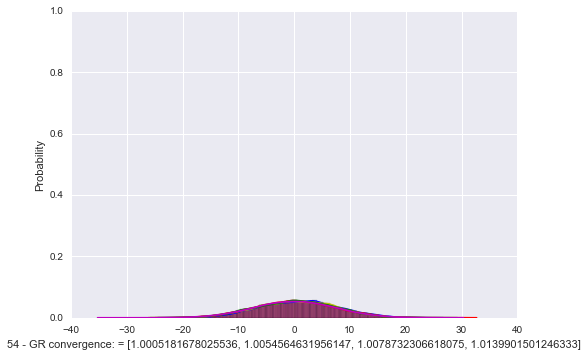

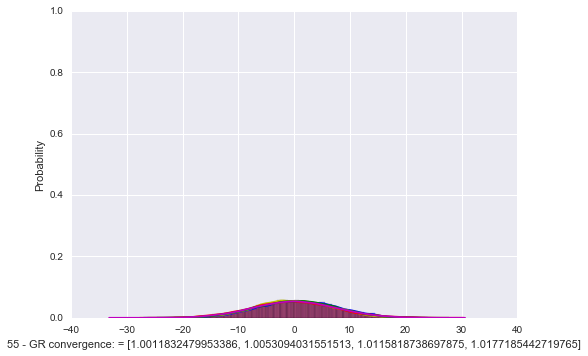

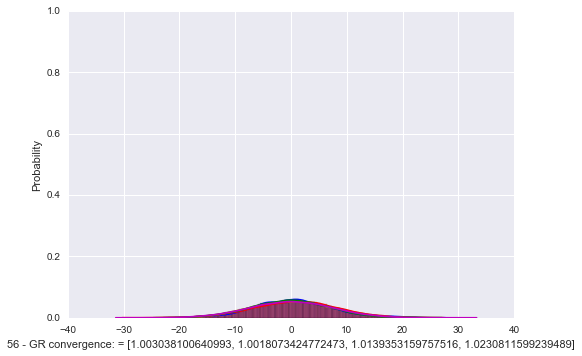

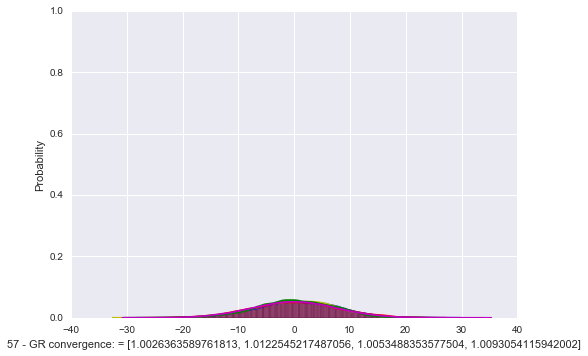

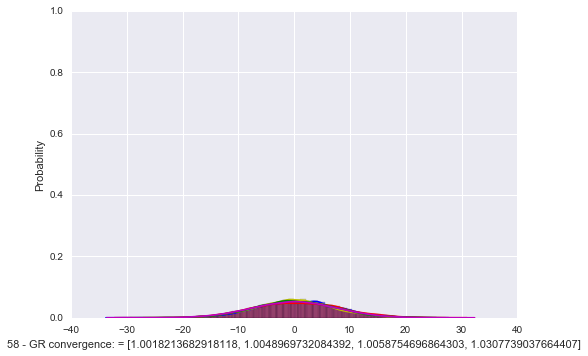

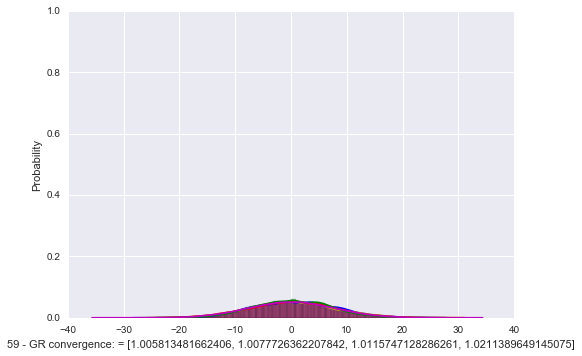

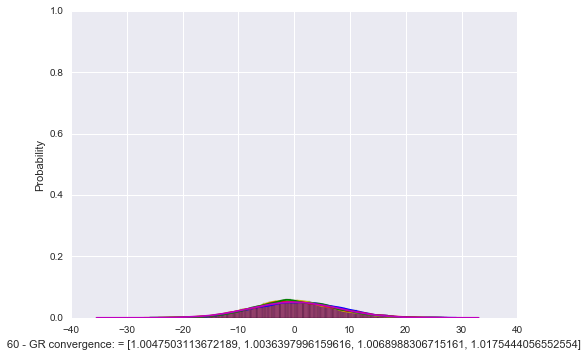

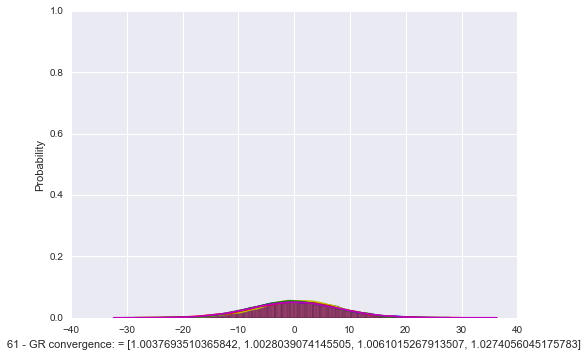

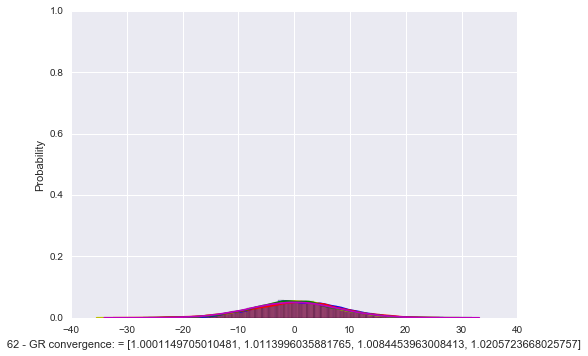

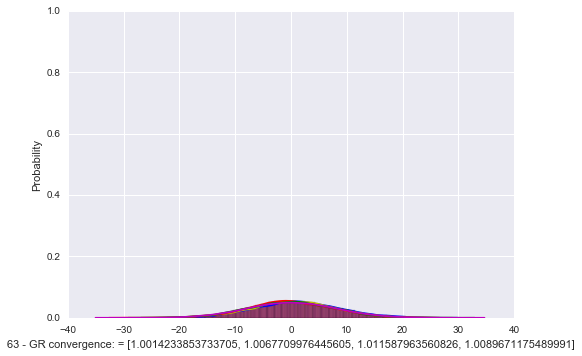

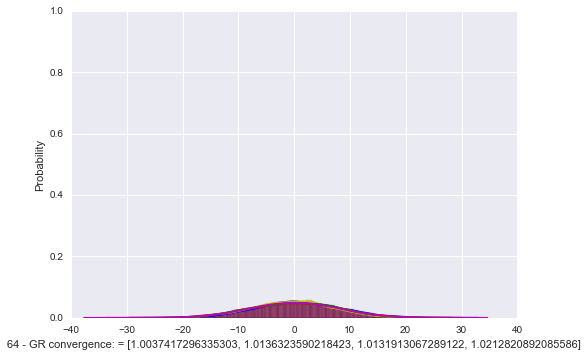

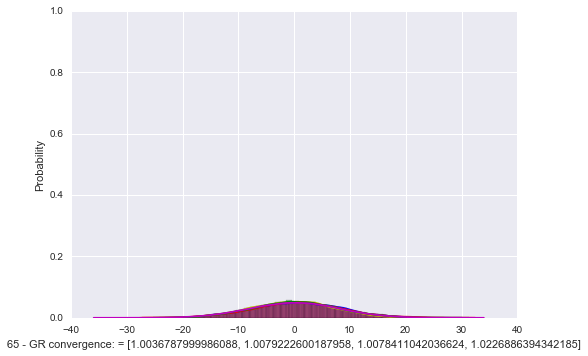

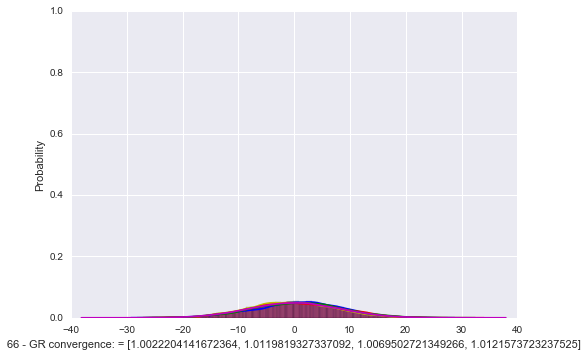

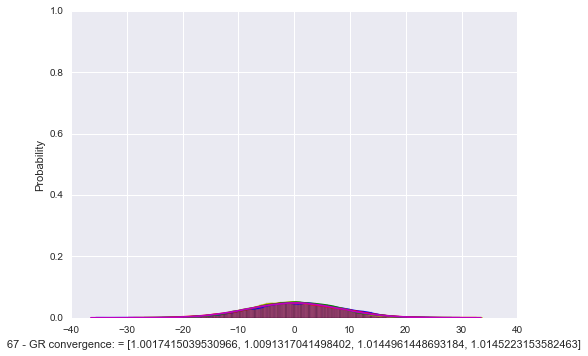

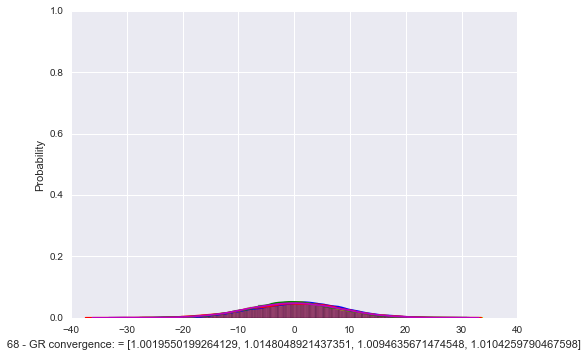

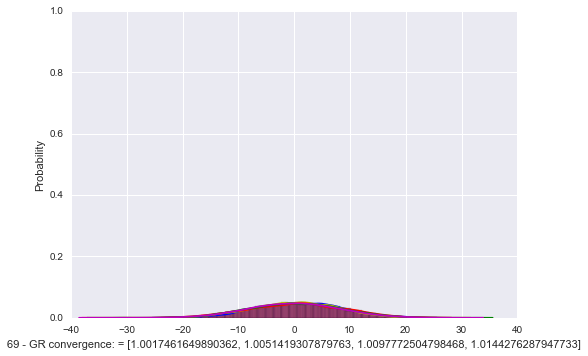

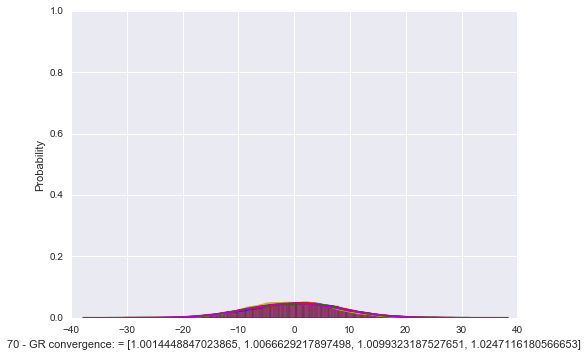

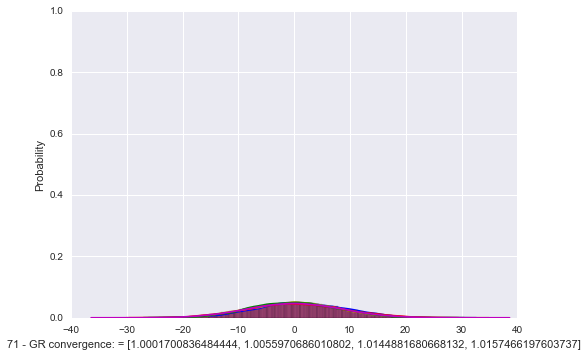

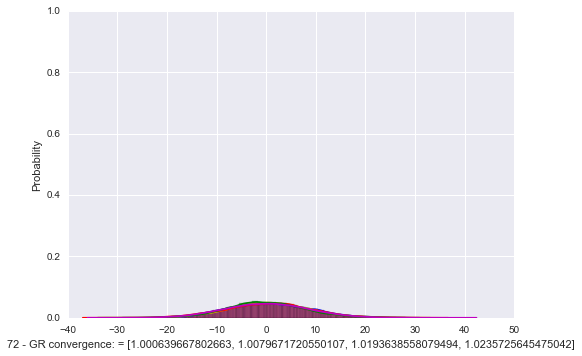

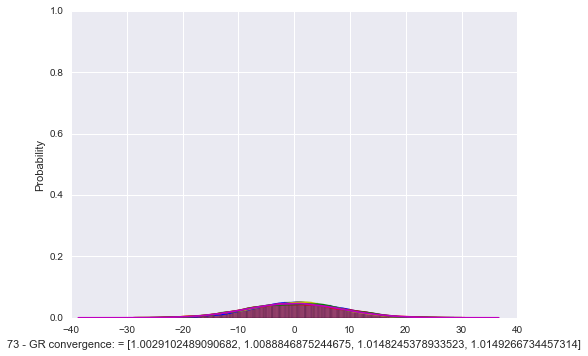

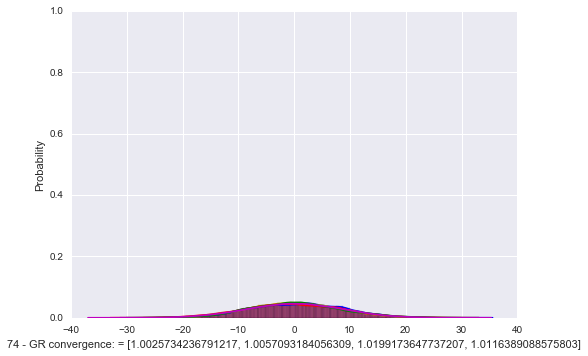

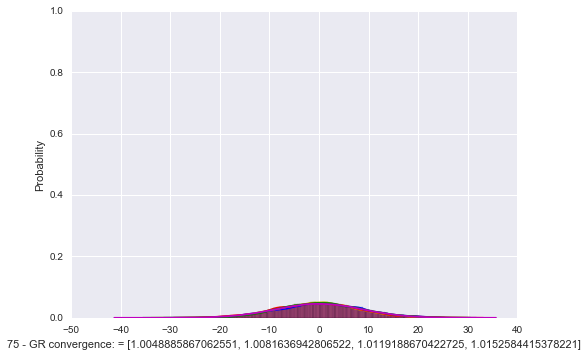

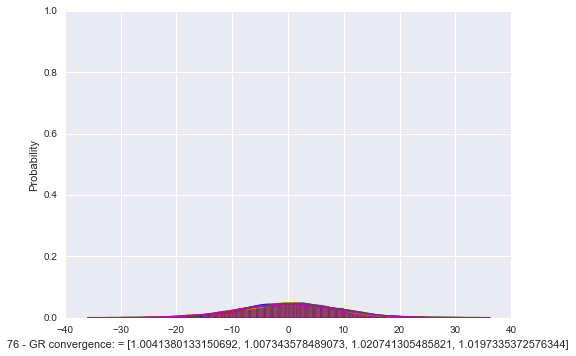

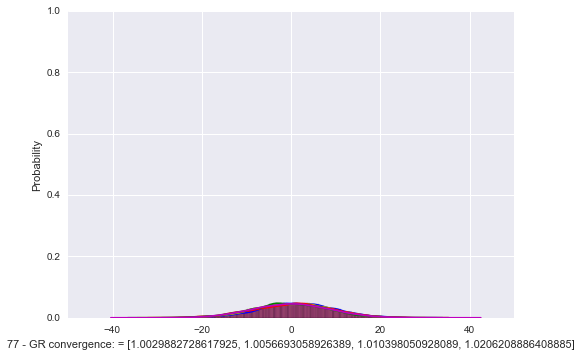

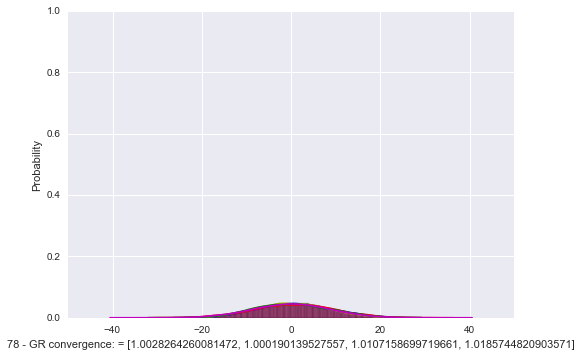

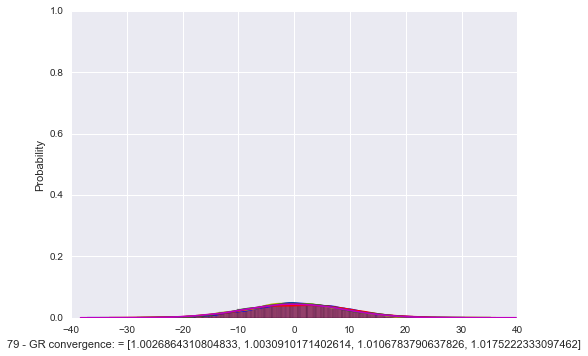

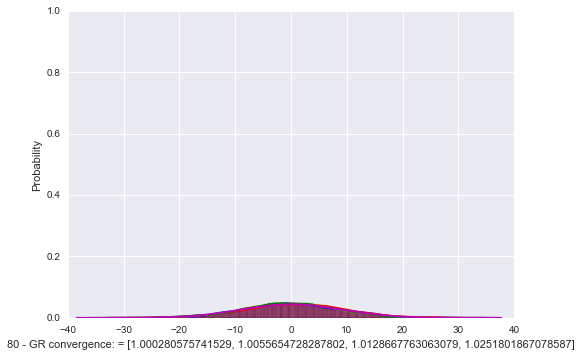

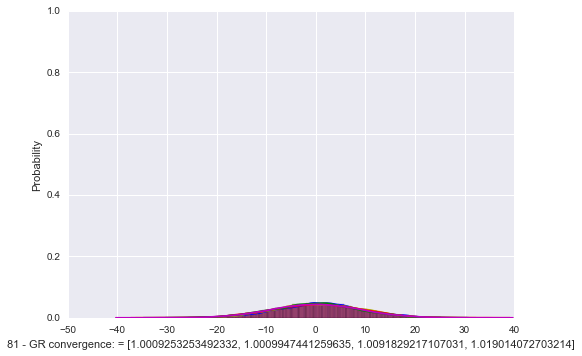

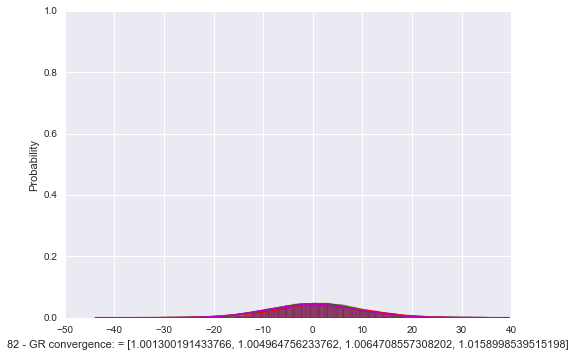

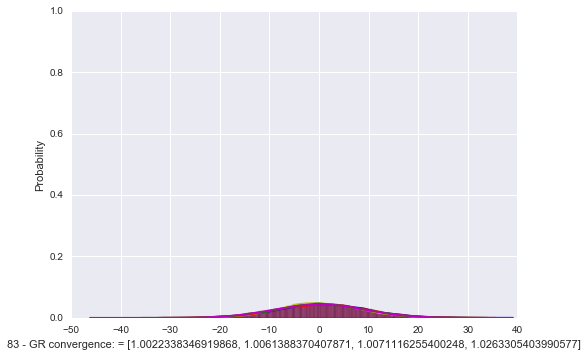

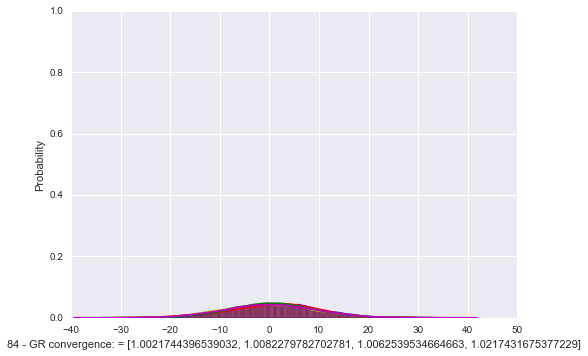

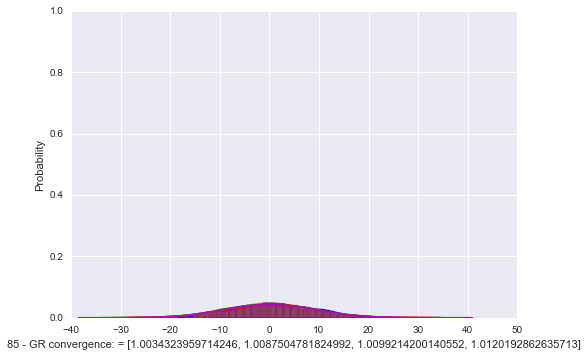

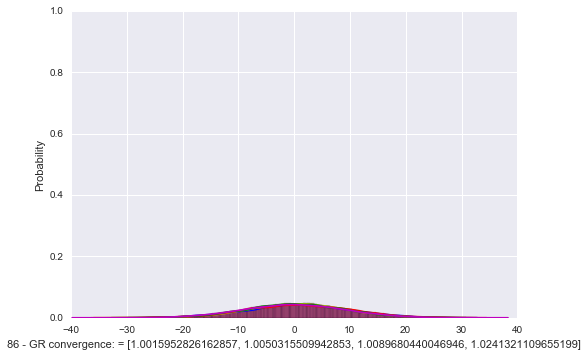

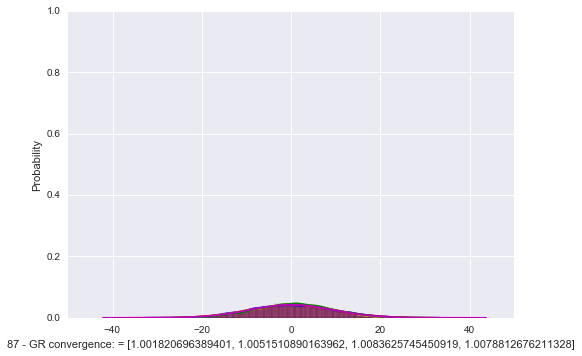

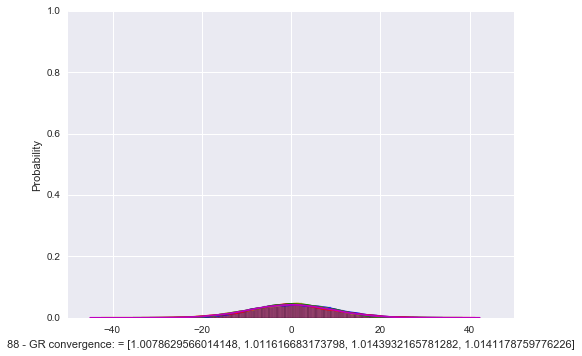

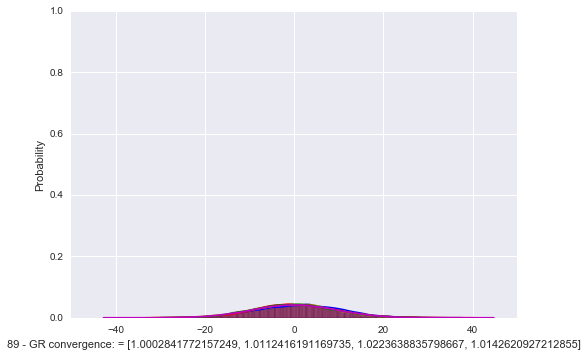

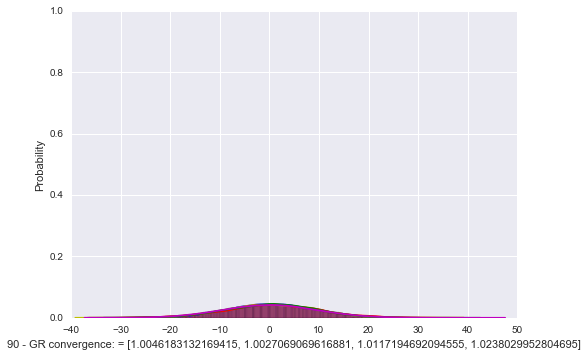

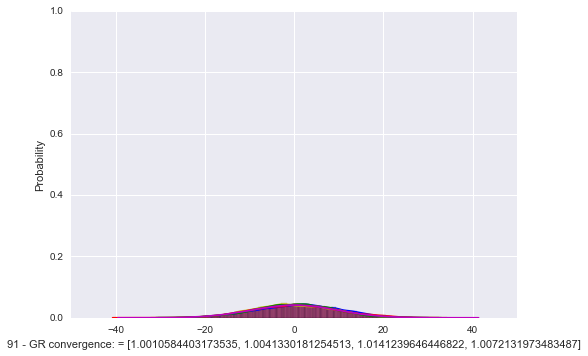

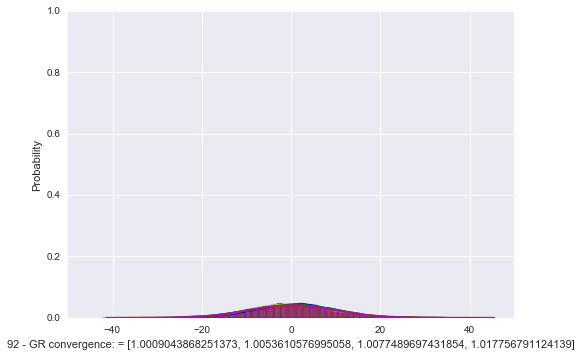

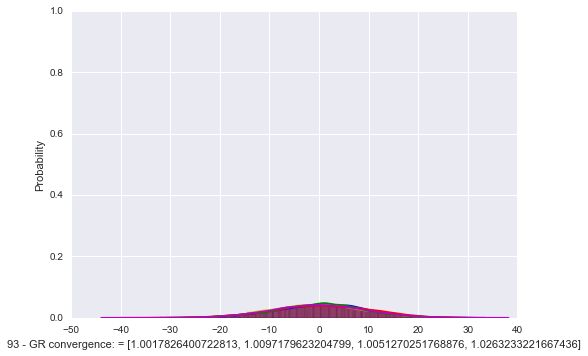

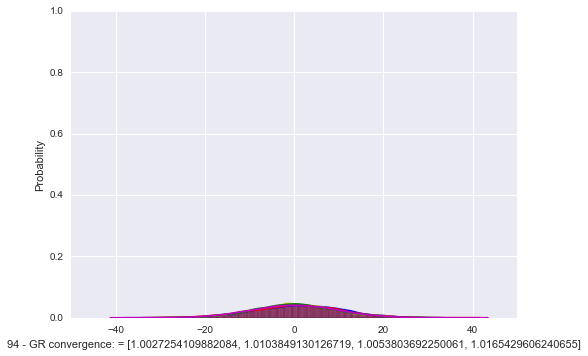

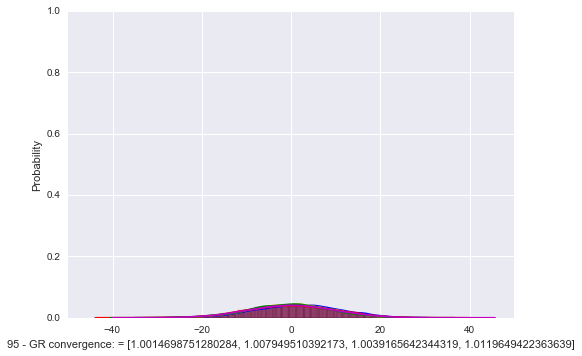

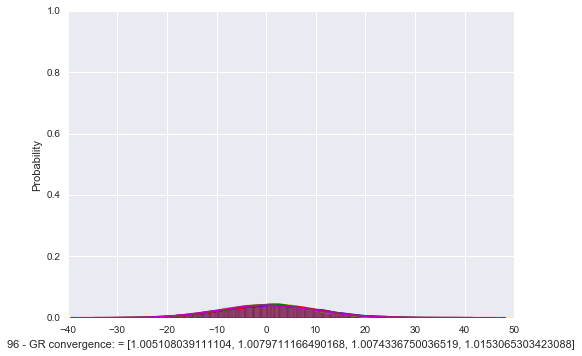

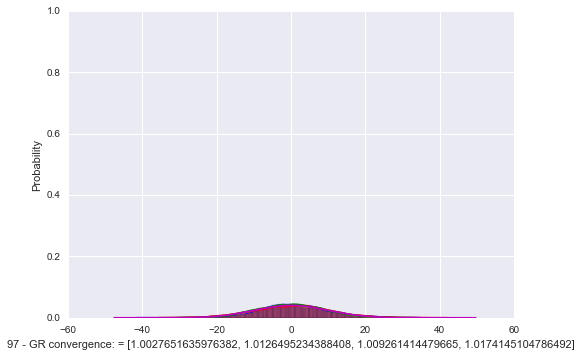

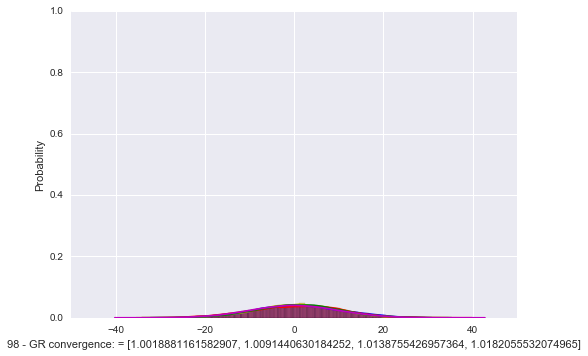

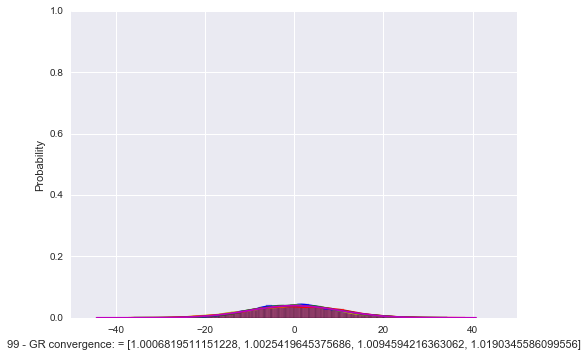

In [22]:
for dim, param_name in enumerate(param_trace_dicts['a']['param_list']):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True, color='y')
    sns.distplot(trace_arr_c[:,dim], hist=True, color='r')
    sns.distplot(trace_arr_d[:,dim], hist=True, color='g')
    sns.distplot(samples[:,dim], hist=True, color='m')
    ax.set_ylim(0, 1.0)
    convg_summary = [gelman_rubin_dicts[trace][param_name] for trace in ['a', 'b', 'c', 'd']]
    sns.axlabel(param_name+' - GR convergence: = '+str(convg_summary), 'Probability')